# Setup

In [1]:
# Add parent directory to current path. Needed for research imports.
import os.path
import sys
p = os.path.abspath('../..')
if p not in sys.path:
    sys.path.insert(0,p)

# Enable hot reloading
%load_ext autoreload
%autoreload 2


import logging
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import warnings

from experiments.irl.datasets import *
from experiments.irl.experiment_utils import *
from research.irl.fair_irl import *
from research.utils import *


logging.basicConfig(level=logging.INFO)
warnings.filterwarnings('ignore')

sns.set_style('darkgrid')

from IPython.display import display, HTML
display(HTML("<style>.container { width:2000px !important; }</style>"))
pd.set_option('display.max_columns', None)
# pd.set_option('display.max_colwidth', None)

# Prevent long logging lines from wrapping
# display(HTML("<style>div.output_area pre {white-space: pre;}</style>"))
np.set_printoptions(linewidth=np.inf)

# Run experiments

### Boston to Adult

In [1417]:
base_exp_info = {
#     'EXPERIMENT_NAME': 'compas_48_hidden',
#     'EXPERIMENT_NAME': 'boston_to_adult_jan8_44',
    'EXPERIMENT_NAME': 'boston_to_adult_svm_6',
#     'EXPERIMENT_NAME': 'adult_to_boston_jan8_33',
#     'EXPERIMENT_NAME': 'COMPAS_to_boston_jan8_32',
    
    'FEAT_EXP_OBJECTIVE_NAMES': [
        'Acc',
#         'AccPar',
        'DemPar',
        'EqOpp',
#         'FPRPar',
        'TNRPar',
#         'FNRPar',
        'PR_Z0',
        'PR_Z1',
        'NR_Z0',
        'NR_Z1',
        'TPR_Z0',
        'TPR_Z1',
        'TNR_Z0',
        'TNR_Z1',
#         'FPR_Z0',
#         'FPR_Z1',
#         'FNR_Z0',
#         'FNR_Z1',
    ],
    'PERF_MEAS_OBJECTIVE_NAMES': [
        'Acc',
        'DemPar',
        'EqOpp',
        'FPRPar',
        'TNRPar',
        'FNRPar',
#         'PR_Z0',
#         'PR_Z1',
#         'TPR_Z0',
#         'TPR_Z1',
#         'TNR_Z0',
#         'TNR_Z1',
#         'FPR_Z0',
#         'FPR_Z1',
#         'FNR_Z0',
#         'FNR_Z1',
        'PredPar',
        'NegPredPar',
    ],
    
    # Expert demo parameters
#     'DATASET': 'ACSIncome__CA',
#     'TARGET_DATASET': 'ACSIncome__IL',
    
    'EXPERT_CANNOT_PREDICT_IN_TARGET': False,
    'USE_HIDDEN_FEATURES_SOURCE': True,
    'USE_HIDDEN_FEATURES_TARGET': False,
    
    'N_EXPERT_DEMOS': 1,
    'EXPERT_ALGO': None,
    'N_DATASET_SAMPLES': 50_000,
    'MIN_FREQ_FILL_PCT': .3,
    'RESTRICT_Y_ACTION': True,
    # IRL Loop parameters
    'IRL_METHOD': None,
    'METHOD': 'highs',
    # Plotting parameters
    'NOISE_FACTOR': .01,
    'ANNOTATE': True,
    'N_INIT_POLICIES': 3,
    'NON_EXPERT_ALGOS': [
        'OptAccNoisy',
        'HardtDemParNoisy',
        'HardtEqOppNoisy',
#         'HardtFPRNoisy',
#         'HardtTNRNoisy',
#         'Dummy',
#         'DummyNoisy',
    ],
}

base_exp_info['N_TRIALS'] = 10
# base_exp_info['IGNORE_RESULTS_EPSILON'] = .06
base_exp_info['EPSILON'] = .000001
base_exp_info['IGNORE_RESULTS_EPSILON'] = .006
base_exp_info['MAX_ITER'] = 40
base_exp_info['ALLOW_NEG_WEIGHTS'] = True
base_exp_info['DOT_WEIGHTS_FEAT_EXP'] = True
base_exp_info['EARLY_STOP_NO_NEW_BEST_ITERS'] = 15

source_states = [
#     'ACSIncome__AL',
#     'ACSIncome__CA',
#     'ACSIncome__FL',
#     'ACSIncome__IL',
#     'ACSIncome__ME',
#     'ACSIncome__NY',
#     'ACSIncome__TX',
#     'ACSIncome__WA',
#     'Adult',
#     'COMPAS',
    'Boston',
]

target_states = [
#     'ACSIncome__AL',
#     'ACSIncome__CA',
#     'ACSIncome__FL',
#     'ACSIncome__IL',
#     'ACSIncome__ME',
#     'ACSIncome__NY',
#     'ACSIncome__TX',
#     'ACSIncome__TX',
    'Adult',
#     'Boston',
#     'COMPAS',
]

### Adult to Boston

In [122]:
base_exp_info = {
#     'EXPERIMENT_NAME': 'compas_48_hidden',
#     'EXPERIMENT_NAME': 'boston_to_adult_jan8_44',
#     'EXPERIMENT_NAME': 'adult_to_boston_jan8_44',
    'EXPERIMENT_NAME': 'adult_to_boston_error_inc_stop_59',
#     'EXPERIMENT_NAME': 'COMPAS_to_boston_jan8_32',
    
    'FEAT_EXP_OBJECTIVE_NAMES': [
        'Acc',
#         'AccPar',
        'DemPar',
        'EqOpp',
#         'FPRPar',
        'TNRPar',
#         'FNRPar',
        'PR_Z0',
        'PR_Z1',
#         'NR_Z0',
#         'NR_Z1',
#         'TPR_Z0',
#         'TPR_Z1',
#         'TNR_Z0',
#         'TNR_Z1',
#         'FPR_Z0',
#         'FPR_Z1',
#         'FNR_Z0',
#         'FNR_Z1',
    ],
    'PERF_MEAS_OBJECTIVE_NAMES': [
        'Acc',
        'DemPar',
        'EqOpp',
        'FPRPar',
        'TNRPar',
        'FNRPar',
#         'PR_Z0',
#         'PR_Z1',
#         'TPR_Z0',
#         'TPR_Z1',
#         'TNR_Z0',
#         'TNR_Z1',
#         'FPR_Z0',
#         'FPR_Z1',
#         'FNR_Z0',
#         'FNR_Z1',
        'PredPar',
        'NegPredPar',
    ],
    
    # Expert demo parameters
#     'DATASET': 'ACSIncome__CA',
#     'TARGET_DATASET': 'ACSIncome__IL',
    
    'EXPERT_CANNOT_PREDICT_IN_TARGET': False,
    'USE_HIDDEN_FEATURES_SOURCE': True,
    'USE_HIDDEN_FEATURES_TARGET': False,
    
    'N_EXPERT_DEMOS': 1,
    'EXPERT_ALGO': None,
    'N_DATASET_SAMPLES': 100_000,
    'MIN_FREQ_FILL_PCT': .3,
    'RESTRICT_Y_ACTION': True,
    # IRL Loop parameters
    'IRL_METHOD': None,
    'METHOD': 'highs',
    # Plotting parameters
    'NOISE_FACTOR': .01,
    'ANNOTATE': True,
    'N_INIT_POLICIES': 1,
    'NON_EXPERT_ALGOS': [
#         'OptAccNoisy',
#         'HardtDemParNoisy',
#         'HardtEqOppNoisy',
#         'HardtFPRNoisy',
#         'HardtTNRNoisy',
        'Dummy',
#         'DummyNoisy',
    ],
}

base_exp_info['N_TRIALS'] = 1
# base_exp_info['IGNORE_RESULTS_EPSILON'] = .06
base_exp_info['EPSILON'] = .005
base_exp_info['IGNORE_RESULTS_EPSILON'] = np.inf
base_exp_info['MAX_ITER'] = 40
base_exp_info['ALLOW_NEG_WEIGHTS'] = True
base_exp_info['DOT_WEIGHTS_FEAT_EXP'] = True
base_exp_info['EARLY_STOP_NO_NEW_BEST_ITERS'] = 15

source_states = [
#     'ACSIncome__AL',
#     'ACSIncome__CA',
#     'ACSIncome__FL',
#     'ACSIncome__IL',
#     'ACSIncome__ME',
#     'ACSIncome__NY',
#     'ACSIncome__TX',
#     'ACSIncome__WA',
    'Adult',
#     'COMPAS',
#     'Boston',
]

target_states = [
#     'ACSIncome__AL',
#     'ACSIncome__CA',
#     'ACSIncome__FL',
#     'ACSIncome__IL',
#     'ACSIncome__ME',
#     'ACSIncome__NY',
#     'ACSIncome__TX',
#     'ACSIncome__TX',
#     'Adult',
    'Boston',
#     'COMPAS',
]

### ACSIncome: State to State MA to MS

In [93]:
base_exp_info = {
#     'EXPERIMENT_NAME': 'compas_48_hidden',
#     'EXPERIMENT_NAME': 'boston_to_adult_jan8_44',
#     'EXPERIMENT_NAME': 'adult_to_boston_jan8_33',
#     'EXPERIMENT_NAME': 'COMPAS_to_boston_jan8_32',
#     'EXPERIMENT_NAME': 'ACSIncome_CA_to_WY_jan8_44',
    'EXPERIMENT_NAME': 'ACSIncome_MA_to_MS_jan8_44',
    
    'FEAT_EXP_OBJECTIVE_NAMES': [
        'Acc',
#         'AccPar',
        'DemPar',
        'EqOpp',
#         'FPRPar',
        'TNRPar',
#         'FNRPar',
        'PR_Z0',
        'PR_Z1',
        'NR_Z0',
        'NR_Z1',
        'TPR_Z0',
        'TPR_Z1',
        'TNR_Z0',
        'TNR_Z1',
#         'FPR_Z0',
#         'FPR_Z1',
#         'FNR_Z0',
#         'FNR_Z1',
    ],
    'PERF_MEAS_OBJECTIVE_NAMES': [
        'Acc',
        'DemPar',
        'EqOpp',
        'FPRPar',
        'TNRPar',
        'FNRPar',
#         'PR_Z0',
#         'PR_Z1',
#         'TPR_Z0',
#         'TPR_Z1',
#         'TNR_Z0',
#         'TNR_Z1',
#         'FPR_Z0',
#         'FPR_Z1',
#         'FNR_Z0',
#         'FNR_Z1',
        'PredPar',
        'NegPredPar',
    ],
    
    # Expert demo parameters
#     'DATASET': 'ACSIncome__CA',
#     'TARGET_DATASET': 'ACSIncome__IL',
    
    'EXPERT_CANNOT_PREDICT_IN_TARGET': False,
    'USE_HIDDEN_FEATURES_SOURCE': True,
    'USE_HIDDEN_FEATURES_TARGET': False,
    
    'N_EXPERT_DEMOS': 1,
    'EXPERT_ALGO': None,
    'N_DATASET_SAMPLES': 40_000,
    'MIN_FREQ_FILL_PCT': .35,
    'RESTRICT_Y_ACTION': True,
    # IRL Loop parameters
    'IRL_METHOD': None,
    'METHOD': 'highs',
    # Plotting parameters
    'NOISE_FACTOR': .01,
    'ANNOTATE': True,
    'N_INIT_POLICIES': 1,
    'NON_EXPERT_ALGOS': [
        'OptAccNoisy',
#         'HardtDemParNoisy',
#         'HardtEqOppNoisy',
#         'HardtFPRNoisy',
#         'HardtTNRNoisy',
#         'Dummy',
#         'DummyNoisy',
    ],
}

base_exp_info['N_TRIALS'] = 1
# base_exp_info['IGNORE_RESULTS_EPSILON'] = .06
base_exp_info['EPSILON'] = .025
base_exp_info['IGNORE_RESULTS_EPSILON'] = .06
base_exp_info['MAX_ITER'] = 40
base_exp_info['ALLOW_NEG_WEIGHTS'] = True
base_exp_info['DOT_WEIGHTS_FEAT_EXP'] = True
base_exp_info['EARLY_STOP_NO_NEW_BEST_ITERS'] = 15

source_states = [
#     'ACSIncome__AL',
#     'ACSIncome__CA',
#     'ACSIncome__FL',
#     'ACSIncome__IL',
#     'ACSIncome__ME',
#     'ACSIncome__NY',
#     'ACSIncome__TX',
    'ACSIncome__MA',
#     'Adult',
#     'COMPAS',
#     'Boston',
]

target_states = [
#     'ACSIncome__AL',
#     'ACSIncome__CA',
#     'ACSIncome__FL',
#     'ACSIncome__IL',
#     'ACSIncome__ME',
#     'ACSIncome__NY',
#     'ACSIncome__TX',
    'ACSIncome__MS',
#     'Adult',
#     'Boston',
#     'COMPAS',
]

### ACSIncome: State to State MS to MA

In [747]:
base_exp_info = {
#     'EXPERIMENT_NAME': 'compas_48_hidden',
#     'EXPERIMENT_NAME': 'boston_to_adult_jan8_44',
#     'EXPERIMENT_NAME': 'adult_to_boston_jan8_33',
#     'EXPERIMENT_NAME': 'COMPAS_to_boston_jan8_32',
#     'EXPERIMENT_NAME': 'ACSIncome_CA_to_WY_jan8_44',
    'EXPERIMENT_NAME': 'ACSIncome_MS_to_MA_jan8_44',
    
    'FEAT_EXP_OBJECTIVE_NAMES': [
        'Acc',
#         'AccPar',
        'DemPar',
        'EqOpp',
#         'FPRPar',
        'TNRPar',
#         'FNRPar',
        'PR_Z0',
        'PR_Z1',
        'NR_Z0',
        'NR_Z1',
        'TPR_Z0',
        'TPR_Z1',
        'TNR_Z0',
        'TNR_Z1',
#         'FPR_Z0',
#         'FPR_Z1',
#         'FNR_Z0',
#         'FNR_Z1',
    ],
    'PERF_MEAS_OBJECTIVE_NAMES': [
        'Acc',
        'DemPar',
        'EqOpp',
        'FPRPar',
        'TNRPar',
        'FNRPar',
#         'PR_Z0',
#         'PR_Z1',
#         'TPR_Z0',
#         'TPR_Z1',
#         'TNR_Z0',
#         'TNR_Z1',
#         'FPR_Z0',
#         'FPR_Z1',
#         'FNR_Z0',
#         'FNR_Z1',
        'PredPar',
        'NegPredPar',
    ],
    
    # Expert demo parameters
#     'DATASET': 'ACSIncome__CA',
#     'TARGET_DATASET': 'ACSIncome__IL',
    
    'EXPERT_CANNOT_PREDICT_IN_TARGET': False,
    'USE_HIDDEN_FEATURES_SOURCE': True,
    'USE_HIDDEN_FEATURES_TARGET': False,
    
    'N_EXPERT_DEMOS': 1,
    'EXPERT_ALGO': None,
    'N_DATASET_SAMPLES': 40_000,
    'MIN_FREQ_FILL_PCT': .35,
    'RESTRICT_Y_ACTION': True,
    # IRL Loop parameters
    'IRL_METHOD': None,
    'METHOD': 'highs',
    # Plotting parameters
    'NOISE_FACTOR': .01,
    'ANNOTATE': True,
    'N_INIT_POLICIES': 1,
    'NON_EXPERT_ALGOS': [
        'OptAccNoisy',
#         'HardtDemParNoisy',
#         'HardtEqOppNoisy',
#         'HardtFPRNoisy',
#         'HardtTNRNoisy',
#         'Dummy',
#         'DummyNoisy',
    ],
}

base_exp_info['N_TRIALS'] = 10
# base_exp_info['IGNORE_RESULTS_EPSILON'] = .06
base_exp_info['EPSILON'] = .015
base_exp_info['IGNORE_RESULTS_EPSILON'] = .04
base_exp_info['MAX_ITER'] = 40
base_exp_info['ALLOW_NEG_WEIGHTS'] = True
base_exp_info['DOT_WEIGHTS_FEAT_EXP'] = True
base_exp_info['EARLY_STOP_NO_NEW_BEST_ITERS'] = 15

source_states = [
#     'ACSIncome__AL',
#     'ACSIncome__CA',
#     'ACSIncome__FL',
#     'ACSIncome__IL',
#     'ACSIncome__ME',
#     'ACSIncome__NY',
#     'ACSIncome__TX',
    'ACSIncome__MS',
#     'Adult',
#     'COMPAS',
#     'Boston',
]

target_states = [
#     'ACSIncome__AL',
#     'ACSIncome__CA',
#     'ACSIncome__FL',
#     'ACSIncome__IL',
#     'ACSIncome__ME',
#     'ACSIncome__NY',
#     'ACSIncome__TX',
    'ACSIncome__MA',
#     'Adult',
#     'Boston',
#     'COMPAS',
]

### Set Experts & Run

In [123]:
expert_algos = [
#     'OptAcc',
    'HardtDemPar',
    'HardtEqOpp',
#     'HardtTNRPar'
#     'HardtFPRPar',
#     'HardtFNRPar',
    'HardtEqOdds',
    'BoundedGroupLoss',
#     'COMPAS',
]
        
experiments = []
for expert_algo in expert_algos:
    for source_dataset in source_states:
        for target_dataset in target_states:
            experiments.append({
                'EXPERT_ALGO': expert_algo,
                'IRL_METHOD': 'FairIRL',
                'DATASET': source_dataset,
                'TARGET_DATASET': target_dataset,
            })

In [124]:
# experiments = [
#     {
#         'EXPERT_ALGO': 'OptAcc',
#         'IRL_METHOD': 'FairIRL',
#     },
#     {
#         'EXPERT_ALGO': 'HardtDemPar',
#         'IRL_METHOD': 'FairIRL',
#     },
#     {
#         'EXPERT_ALGO': 'HardtEqOpp',
#         'IRL_METHOD': 'FairIRL',
#     },
# #     {
# #         'EXPERT_ALGO': 'COMPAS',
# #         'IRL_METHOD': 'FairIRL',
# #         'USE_HIDDEN_FEATURES_SOURCE': True,
# #         'USE_HIDDEN_FEATURES_TARGET': False,
# #         'EXPERT_CANNOT_PREDICT_IN_TARGET': True,
# #     },
    
    
# #     {
# #         'EXPERT_ALGO': 'OptAcc',
# #         'IRL_METHOD': 'FairIRLFO',
# #     },
# #     {
# #         'EXPERT_ALGO': 'HardtDemPar',
# #         'IRL_METHOD': 'FairIRLFO',
# #     },
# #     {
# #         'EXPERT_ALGO': 'HardtEqOpp',
# #         'IRL_METHOD': 'FairIRLFO',
# #     },
# ]

In [125]:
# for exp_i, experiment in enumerate(experiments):
#     logging.info('\n\n')
#     logging.info(f"EXPERIMENT {exp_i+1}/{len(experiments)}")
    
#     exp_info = dict(base_exp_info)
    
#     for k in experiment:
#         exp_info[k] = experiment[k]
        
#     run_experiment(exp_info)

In [126]:
exp_info = dict(base_exp_info)

In [130]:
for exp_i, experiment in enumerate(experiments):
    logging.info('\n\n')
    logging.info(f"EXPERIMENT {exp_i+1}/{len(experiments)}")
    
    exp_info = dict(base_exp_info)
    
    for k in experiment:
        exp_info[k] = experiment[k]
        
    source_X, source_y, source_feature_types = generate_dataset(
        experiment['DATASET'],
        n_samples=exp_info['N_DATASET_SAMPLES'],
    )

    target_X, target_y, target_feature_types = generate_dataset(
        experiment['TARGET_DATASET'],
        n_samples=exp_info['N_DATASET_SAMPLES'],
    )

    for f in source_feature_types['categoric']:
        source_X[f] = source_X[f].astype(str)

    for f in target_feature_types['categoric']:
        target_X[f] = target_X[f].astype(str)
                   
    source_X_cols = (
        source_feature_types['boolean']
        + source_feature_types['categoric']
        + source_feature_types['continuous']
    )
    
    if exp_info['USE_HIDDEN_FEATURES_SOURCE']:
        source_X_cols += source_feature_types['hidden']
    _source_X = source_X[source_X_cols]
    
    
    target_X_cols = (
        target_feature_types['boolean']
        + target_feature_types['categoric']
        + target_feature_types['continuous']
    )
    if exp_info['USE_HIDDEN_FEATURES_TARGET']:
        target_X_cols += target_feature_types['hidden']
    _target_X = target_X[target_X_cols]
    
    source_beh_clone_clf = run_behavior_clone_experiment(
        exp_info,
        source_X=_source_X,
        source_y=source_y,
        source_feature_types=source_feature_types,
        target_X=_target_X,
        target_y=target_y,
        target_feature_types=target_feature_types,
    )

    source_clf_pol, target_clf_pol = run_experiment(
        exp_info,
        source_X=_source_X,
        source_y=source_y,
        source_feature_types=source_feature_types,
        target_X=_target_X,
        target_y=target_y,
        target_feature_types=target_feature_types,
    )

INFO:root:


INFO:root:EXPERIMENT 1/4
INFO:root:

BEHAVIOR CLONING TRIAL 0

INFO:root:muE:
[[0.77060966 0.99977677 0.89740244 0.90063598 0.28038674 0.28060997]]
INFO:root:muE_hold:
[[0.78144172 0.96675703 0.96483782 0.90911706 0.30769231 0.27444934]]
INFO:root:muE_perf_hold:
[[0.78144172 0.96675703 0.96483782 0.90911706 0.90911706 0.96483782 0.75378133 0.94042782]]
INFO:root:muL:
[[0.4983704  0.99814691 0.99014015 0.99910873 0.50101557 0.49916248]]
INFO:root:		 muL[0] = [0.79  0.859 0.821 0.939 0.142 0.283]


,Acc,DemPar,EqOpp,TNRPar,PR_Z0,PR_Z1,is_expert,muL_best_Acc,muL_hold_Acc,muL_best_hold_Acc,muL_best_DemPar,muL_hold_DemPar,muL_best_hold_DemPar,muL_best_EqOpp,muL_hold_EqOpp,muL_best_hold_EqOpp,muL_best_TNRPar,muL_hold_TNRPar,muL_best_hold_TNRPar,muL_best_PR_Z0,muL_hold_PR_Z0,muL_best_hold_PR_Z0,muL_best_PR_Z1,muL_hold_PR_Z1,muL_best_hold_PR_Z1,muL_perf_best_hold_Acc,muL_perf_best_hold_DemPar,muL_perf_best_hold_EqOpp,muL_perf_best_hold_FPRPar,muL_perf_best_hold_TNRPar,muL_perf_best_hold_FNRPar,muL_perf_best_hold_PredPar,muL_perf_best_hold_NegPredPar,is_init_policy,learn_idx,Acc_weight,DemPar_weight,EqOpp_weight,TNRPar_weight,PR_Z0_weight,PR_Z1_weight,t,t_hold,mu_delta_l2norm,mu_delta_l2norm_hold
0,0.771,1.000,0.897,0.901,0.280,0.281,1,0.00,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,inf,inf,0.0,0.0
1,0.498,0.998,0.990,0.999,0.501,0.499,0,0.00,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,inf,inf,0.0,0.0
2,0.790,0.859,0.821,0.939,0.142,0.283,0,0.79,0.787,0.787,0.859,0.879,0.879,0.821,0.868,0.868,0.939,0.941,0.941,0.142,0.155,0.155,0.283,0.276,0.276,0.787,0.879,0.868,0.941,0.941,0.868,0.951,0.958,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


INFO:root:exp_info: {'EXPERIMENT_NAME': 'adult_to_boston_error_inc_stop_59', 'FEAT_EXP_OBJECTIVE_NAMES': ['Acc', 'DemPar', 'EqOpp', 'TNRPar', 'PR_Z0', 'PR_Z1'], 'PERF_MEAS_OBJECTIVE_NAMES': ['Acc', 'DemPar', 'EqOpp', 'FPRPar', 'TNRPar', 'FNRPar', 'PredPar', 'NegPredPar'], 'EXPERT_CANNOT_PREDICT_IN_TARGET': False, 'USE_HIDDEN_FEATURES_SOURCE': True, 'USE_HIDDEN_FEATURES_TARGET': False, 'N_EXPERT_DEMOS': 1, 'EXPERT_ALGO': 'HardtDemPar', 'N_DATASET_SAMPLES': 100000, 'MIN_FREQ_FILL_PCT': 0.3, 'RESTRICT_Y_ACTION': True, 'IRL_METHOD': 'FairIRL', 'METHOD': 'highs', 'NOISE_FACTOR': 0.01, 'ANNOTATE': True, 'N_INIT_POLICIES': 1, 'NON_EXPERT_ALGOS': ['Dummy'], 'N_TRIALS': 1, 'EPSILON': 0.005, 'IGNORE_RESULTS_EPSILON': inf, 'MAX_ITER': 40, 'ALLOW_NEG_WEIGHTS': True, 'DOT_WEIGHTS_FEAT_EXP': True, 'EARLY_STOP_NO_NEW_BEST_ITERS': 15, 'DATASET': 'Adult', 'TARGET_DATASET': 'Boston'}
INFO:root:Experiment timestamp: 2024-01-22 14:15:50
INFO:root:

TRIAL 0

INFO:root:muE:
[[0.77415644 0.9985148  0.953591 

best_iter 7


,Acc,DemPar,EqOpp,TNRPar,PR_Z0,PR_Z1,is_expert,muL_best_Acc,muL_hold_Acc,muL_best_hold_Acc,muL_best_DemPar,muL_hold_DemPar,muL_best_hold_DemPar,muL_best_EqOpp,muL_hold_EqOpp,muL_best_hold_EqOpp,muL_best_TNRPar,muL_hold_TNRPar,muL_best_hold_TNRPar,muL_best_PR_Z0,muL_hold_PR_Z0,muL_best_hold_PR_Z0,muL_best_PR_Z1,muL_hold_PR_Z1,muL_best_hold_PR_Z1,muL_perf_best_hold_Acc,muL_perf_best_hold_DemPar,muL_perf_best_hold_EqOpp,muL_perf_best_hold_FPRPar,muL_perf_best_hold_TNRPar,muL_perf_best_hold_FNRPar,muL_perf_best_hold_PredPar,muL_perf_best_hold_NegPredPar,is_init_policy,learn_idx,Acc_weight,DemPar_weight,EqOpp_weight,TNRPar_weight,PR_Z0_weight,PR_Z1_weight,t,t_hold,mu_delta_l2norm,mu_delta_l2norm_hold
0,0.774,0.999,0.954,0.916,0.284,0.283,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,0.000,0.000,0.000,inf,inf,inf,inf
1,0.505,0.989,0.985,0.990,0.502,0.492,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,0.0,0.000,0.000,0.000,0.000,0.000,0.000,inf,inf,inf,0.410
2,0.750,0.925,0.793,0.985,0.000,0.075,0,0.750,0.752,0.752,0.925,0.929,0.929,0.793,0.804,0.804,0.985,0.984,0.984,0.000,0.000,0.000,0.075,0.071,0.071,0.752,0.929,0.804,0.984,0.984,0.804,1.000,0.924,0.0,1.0,0.332,0.011,-0.038,-0.091,-0.269,-0.258,0.206,0.206,1.257,1.268
3,0.688,0.425,0.998,0.210,0.929,0.354,0,0.688,0.692,0.692,0.425,0.420,0.420,0.998,0.922,0.922,0.210,0.228,0.228,0.929,0.927,0.927,0.354,0.347,0.347,0.692,0.420,0.922,0.228,0.228,0.922,0.538,0.567,0.0,2.0,0.395,0.115,0.183,-0.196,0.103,0.008,0.092,0.092,2.481,2.442
4,0.762,0.985,0.999,0.904,0.398,0.382,0,0.762,0.760,0.760,0.985,0.991,0.991,0.999,0.954,0.954,0.904,0.901,0.901,0.398,0.386,0.386,0.382,0.377,0.377,0.760,0.991,0.954,0.901,0.901,0.954,0.737,0.967,0.0,3.0,0.397,0.242,0.206,-0.063,0.044,0.048,0.085,0.085,0.536,0.476
5,0.706,0.996,0.988,1.000,0.000,0.004,0,0.706,0.710,0.710,0.996,0.998,0.998,0.988,0.993,0.993,1.000,1.000,1.000,0.000,0.001,0.001,0.004,0.003,0.003,0.710,0.998,0.993,1.000,1.000,0.993,0.300,0.884,0.0,4.0,0.184,0.356,0.143,-0.121,-0.030,-0.165,0.020,0.020,1.410,1.410
6,0.724,0.993,0.274,0.738,0.386,0.380,0,0.724,0.725,0.725,0.993,0.980,0.980,0.274,0.320,0.320,0.738,0.740,0.740,0.386,0.393,0.393,0.380,0.373,0.373,0.725,0.980,0.320,0.740,0.740,0.320,0.421,0.834,0.0,5.0,0.300,0.358,-0.080,-0.184,0.000,-0.078,0.017,0.017,0.894,0.854
7,0.765,0.997,0.999,0.953,0.153,0.151,0,0.765,0.763,0.763,0.997,0.987,0.987,0.999,0.956,0.956,0.953,0.954,0.954,0.153,0.154,0.154,0.151,0.141,0.141,0.763,0.987,0.956,0.954,0.954,0.956,0.739,0.901,0.0,6.0,0.491,0.290,0.007,-0.122,-0.073,-0.017,0.015,0.015,0.658,0.688
8,0.780,1.000,0.815,0.972,0.333,0.333,0,0.780,0.780,0.780,1.000,0.996,0.996,0.815,0.841,0.841,0.972,0.960,0.960,0.333,0.330,0.330,0.333,0.326,0.326,0.780,0.996,0.841,0.960,0.960,0.841,0.846,0.898,0.0,7.0,0.455,0.251,-0.023,0.020,-0.109,0.142,0.011,0.011,0.293,0.256
9,0.770,1.000,1.000,0.927,0.333,0.333,0,0.770,0.771,0.771,1.000,0.999,0.999,1.000,0.981,0.981,0.927,0.925,0.925,0.333,0.325,0.325,0.333,0.326,0.326,0.771,0.999,0.981,0.925,0.925,0.981,0.750,0.947,0.0,8.0,0.391,0.224,0.017,-0.144,-0.114,0.110,0.007,0.007,0.253,0.197


INFO:root:
		Found 3 optimal policies.
INFO:root:target domain muL = [0.854 0.984 0.992 0.725 0.57  0.554]
INFO:root:target domain muE = [0.864 0.998 0.984 0.756 0.572 0.57 ]
INFO:root:target domain muL_hold = [0.853 0.993 0.995 0.733 0.562 0.555]
INFO:root:target domain muL_perf_hold = [0.853 0.993 0.995 0.733 0.733 0.995 0.65  0.955]
INFO:root:


INFO:root:EXPERIMENT 2/4
INFO:root:

BEHAVIOR CLONING TRIAL 0

INFO:root:muE:
[[0.76207822 0.90711002 0.93147759 0.94748904 0.09583333 0.18872331]]
INFO:root:muE_hold:
[[0.7779908  0.96699648 0.96382117 0.97879186 0.23478261 0.26778612]]
INFO:root:muE_perf_hold:
[[0.7779908  0.96699648 0.96382117 0.97879186 0.97879186 0.96382117 0.80576947 0.90942238]]
INFO:root:muL:
[[0.49961656 0.97598994 0.99975273 0.96878277 0.52484683 0.50083677]]
INFO:root:		 muL[0] = [0.79  0.833 0.793 0.91  0.102 0.268]


,Acc,DemPar,EqOpp,TNRPar,PR_Z0,PR_Z1,is_expert,muL_best_Acc,muL_hold_Acc,muL_best_hold_Acc,muL_best_DemPar,muL_hold_DemPar,muL_best_hold_DemPar,muL_best_EqOpp,muL_hold_EqOpp,muL_best_hold_EqOpp,muL_best_TNRPar,muL_hold_TNRPar,muL_best_hold_TNRPar,muL_best_PR_Z0,muL_hold_PR_Z0,muL_best_hold_PR_Z0,muL_best_PR_Z1,muL_hold_PR_Z1,muL_best_hold_PR_Z1,muL_perf_best_hold_Acc,muL_perf_best_hold_DemPar,muL_perf_best_hold_EqOpp,muL_perf_best_hold_FPRPar,muL_perf_best_hold_TNRPar,muL_perf_best_hold_FNRPar,muL_perf_best_hold_PredPar,muL_perf_best_hold_NegPredPar,is_init_policy,learn_idx,Acc_weight,DemPar_weight,EqOpp_weight,TNRPar_weight,PR_Z0_weight,PR_Z1_weight,t,t_hold,mu_delta_l2norm,mu_delta_l2norm_hold
0,0.762,0.907,0.931,0.947,0.096,0.189,1,0.00,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.00,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,inf,inf,0.0,0.0
1,0.500,0.976,1.000,0.969,0.525,0.501,0,0.00,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.00,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,inf,inf,0.0,0.0
2,0.790,0.833,0.793,0.910,0.102,0.268,0,0.79,0.784,0.784,0.833,0.835,0.835,0.793,0.761,0.761,0.91,0.916,0.916,0.102,0.102,0.102,0.268,0.266,0.266,0.784,0.835,0.761,0.916,0.916,0.761,0.965,0.962,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


INFO:root:exp_info: {'EXPERIMENT_NAME': 'adult_to_boston_error_inc_stop_59', 'FEAT_EXP_OBJECTIVE_NAMES': ['Acc', 'DemPar', 'EqOpp', 'TNRPar', 'PR_Z0', 'PR_Z1'], 'PERF_MEAS_OBJECTIVE_NAMES': ['Acc', 'DemPar', 'EqOpp', 'FPRPar', 'TNRPar', 'FNRPar', 'PredPar', 'NegPredPar'], 'EXPERT_CANNOT_PREDICT_IN_TARGET': False, 'USE_HIDDEN_FEATURES_SOURCE': True, 'USE_HIDDEN_FEATURES_TARGET': False, 'N_EXPERT_DEMOS': 1, 'EXPERT_ALGO': 'HardtEqOpp', 'N_DATASET_SAMPLES': 100000, 'MIN_FREQ_FILL_PCT': 0.3, 'RESTRICT_Y_ACTION': True, 'IRL_METHOD': 'FairIRL', 'METHOD': 'highs', 'NOISE_FACTOR': 0.01, 'ANNOTATE': True, 'N_INIT_POLICIES': 1, 'NON_EXPERT_ALGOS': ['Dummy'], 'N_TRIALS': 1, 'EPSILON': 0.005, 'IGNORE_RESULTS_EPSILON': inf, 'MAX_ITER': 40, 'ALLOW_NEG_WEIGHTS': True, 'DOT_WEIGHTS_FEAT_EXP': True, 'EARLY_STOP_NO_NEW_BEST_ITERS': 15, 'DATASET': 'Adult', 'TARGET_DATASET': 'Boston'}
INFO:root:Experiment timestamp: 2024-01-22 14:17:10
INFO:root:

TRIAL 0

INFO:root:muE:
[[0.76830905 0.92488794 0.94539923

best_iter 8


,Acc,DemPar,EqOpp,TNRPar,PR_Z0,PR_Z1,is_expert,muL_best_Acc,muL_hold_Acc,muL_best_hold_Acc,muL_best_DemPar,muL_hold_DemPar,muL_best_hold_DemPar,muL_best_EqOpp,muL_hold_EqOpp,muL_best_hold_EqOpp,muL_best_TNRPar,muL_hold_TNRPar,muL_best_hold_TNRPar,muL_best_PR_Z0,muL_hold_PR_Z0,muL_best_hold_PR_Z0,muL_best_PR_Z1,muL_hold_PR_Z1,muL_best_hold_PR_Z1,muL_perf_best_hold_Acc,muL_perf_best_hold_DemPar,muL_perf_best_hold_EqOpp,muL_perf_best_hold_FPRPar,muL_perf_best_hold_TNRPar,muL_perf_best_hold_FNRPar,muL_perf_best_hold_PredPar,muL_perf_best_hold_NegPredPar,is_init_policy,learn_idx,Acc_weight,DemPar_weight,EqOpp_weight,TNRPar_weight,PR_Z0_weight,PR_Z1_weight,t,t_hold,mu_delta_l2norm,mu_delta_l2norm_hold
0,0.768,0.925,0.945,0.964,0.108,0.183,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,0.000,0.000,0.000,inf,inf,inf,inf
1,0.491,0.982,0.968,0.983,0.492,0.510,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,0.0,0.000,0.000,0.000,0.000,0.000,0.000,inf,inf,inf,0.525
2,0.712,0.991,0.972,1.000,0.000,0.009,0,0.712,0.706,0.706,0.991,0.993,0.993,0.972,0.981,0.981,1.000,0.998,0.998,0.000,0.000,0.000,0.009,0.007,0.007,0.706,0.993,0.981,0.998,0.998,0.981,1.000,0.888,0.0,1.0,0.256,-0.053,-0.020,-0.017,-0.353,-0.301,0.290,0.290,1.384,1.399
3,0.382,0.000,0.000,0.000,0.000,1.000,0,0.382,0.387,0.387,0.000,0.004,0.004,0.000,0.003,0.003,0.000,0.005,0.005,0.000,0.000,0.000,1.000,0.996,0.996,0.387,0.004,0.003,0.005,0.005,0.003,1.000,0.949,0.0,2.0,0.372,-0.218,-0.087,-0.106,-0.031,0.187,0.072,0.072,4.911,3.983
4,0.672,0.482,0.998,0.278,0.962,0.444,0,0.672,0.673,0.673,0.482,0.494,0.494,0.998,0.987,0.987,0.278,0.294,0.294,0.962,0.944,0.944,0.444,0.438,0.438,0.673,0.494,0.987,0.294,0.294,0.987,0.593,0.468,0.0,3.0,0.537,-0.113,0.068,0.043,0.063,0.176,0.061,0.061,8.065,6.059
5,0.722,0.953,0.997,0.978,0.472,0.519,0,0.722,0.718,0.718,0.953,0.976,0.976,0.997,0.968,0.968,0.978,0.943,0.943,0.472,0.493,0.493,0.519,0.517,0.517,0.718,0.976,0.968,0.943,0.943,0.968,0.805,0.984,0.0,4.0,0.504,-0.068,0.014,0.137,-0.026,0.252,0.059,0.059,3.830,2.921
6,0.743,0.492,0.115,0.664,0.000,0.508,0,0.743,0.743,0.743,0.492,0.494,0.494,0.115,0.120,0.120,0.664,0.665,0.665,0.000,0.000,0.000,0.508,0.506,0.506,0.743,0.494,0.120,0.665,0.665,0.120,1.000,0.877,0.0,5.0,0.569,-0.182,0.015,0.053,-0.106,0.076,0.035,0.035,2.286,1.902
7,0.785,0.889,0.998,0.939,0.243,0.354,0,0.785,0.785,0.785,0.889,0.902,0.902,0.998,0.992,0.992,0.939,0.955,0.955,0.243,0.255,0.255,0.354,0.352,0.352,0.785,0.902,0.992,0.955,0.955,0.992,0.915,0.938,0.0,6.0,0.414,-0.165,0.174,-0.022,-0.133,0.093,0.032,0.032,1.562,1.036
8,0.762,0.810,0.329,0.998,0.139,0.329,0,0.762,0.765,0.765,0.810,0.792,0.792,0.329,0.349,0.349,0.998,0.974,0.974,0.139,0.117,0.117,0.329,0.325,0.325,0.765,0.792,0.349,0.974,0.974,0.349,0.379,0.934,0.0,7.0,0.629,0.010,-0.083,0.169,-0.050,-0.059,0.011,0.011,1.075,0.809
9,0.776,0.774,0.506,0.896,0.000,0.226,0,0.776,0.773,0.773,0.774,0.782,0.782,0.506,0.522,0.522,0.896,0.901,0.901,0.000,0.000,0.000,0.226,0.218,0.218,0.773,0.782,0.522,0.901,0.901,0.522,1.000,0.989,0.0,8.0,0.672,-0.073,0.013,0.045,-0.135,-0.062,0.011,0.011,1.141,1.119


INFO:root:
		Found 1 optimal policies.
INFO:root:target domain muL = [0.899 0.811 0.998 0.968 0.318 0.507]
INFO:root:target domain muE = [0.903 0.8   0.998 0.939 0.369 0.569]
INFO:root:target domain muL_hold = [0.903 0.809 0.993 0.962 0.317 0.508]
INFO:root:target domain muL_perf_hold = [0.903 0.809 0.993 0.962 0.962 0.993 0.998 0.916]
INFO:root:


INFO:root:EXPERIMENT 3/4
INFO:root:

BEHAVIOR CLONING TRIAL 0

INFO:root:muE:
[[0.76667945 0.91145233 0.97978281 0.95213046 0.12424446 0.21279213]]
INFO:root:muE_hold:
[[0.78719325 0.87523153 0.89577758 0.95339343 0.16618076 0.29094923]]
INFO:root:muE_perf_hold:
[[0.78719325 0.87523153 0.89577758 0.95339343 0.95339343 0.89577758 0.85019833 0.92729189]]
INFO:root:muL:
[[0.49693252 0.99002542 0.9981035  0.98657898 0.5177495  0.50777492]]
INFO:root:		 muL[0] = [0.788 0.836 0.825 0.91  0.129 0.293]


,Acc,DemPar,EqOpp,TNRPar,PR_Z0,PR_Z1,is_expert,muL_best_Acc,muL_hold_Acc,muL_best_hold_Acc,muL_best_DemPar,muL_hold_DemPar,muL_best_hold_DemPar,muL_best_EqOpp,muL_hold_EqOpp,muL_best_hold_EqOpp,muL_best_TNRPar,muL_hold_TNRPar,muL_best_hold_TNRPar,muL_best_PR_Z0,muL_hold_PR_Z0,muL_best_hold_PR_Z0,muL_best_PR_Z1,muL_hold_PR_Z1,muL_best_hold_PR_Z1,muL_perf_best_hold_Acc,muL_perf_best_hold_DemPar,muL_perf_best_hold_EqOpp,muL_perf_best_hold_FPRPar,muL_perf_best_hold_TNRPar,muL_perf_best_hold_FNRPar,muL_perf_best_hold_PredPar,muL_perf_best_hold_NegPredPar,is_init_policy,learn_idx,Acc_weight,DemPar_weight,EqOpp_weight,TNRPar_weight,PR_Z0_weight,PR_Z1_weight,t,t_hold,mu_delta_l2norm,mu_delta_l2norm_hold
0,0.767,0.911,0.980,0.952,0.124,0.213,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.00,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,inf,inf,0.0,0.0
1,0.497,0.990,0.998,0.987,0.518,0.508,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.00,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,inf,inf,0.0,0.0
2,0.788,0.836,0.825,0.910,0.129,0.293,0,0.788,0.786,0.786,0.836,0.861,0.861,0.825,0.839,0.839,0.91,0.928,0.928,0.129,0.156,0.156,0.293,0.296,0.296,0.786,0.861,0.839,0.928,0.928,0.839,0.949,0.964,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


INFO:root:exp_info: {'EXPERIMENT_NAME': 'adult_to_boston_error_inc_stop_59', 'FEAT_EXP_OBJECTIVE_NAMES': ['Acc', 'DemPar', 'EqOpp', 'TNRPar', 'PR_Z0', 'PR_Z1'], 'PERF_MEAS_OBJECTIVE_NAMES': ['Acc', 'DemPar', 'EqOpp', 'FPRPar', 'TNRPar', 'FNRPar', 'PredPar', 'NegPredPar'], 'EXPERT_CANNOT_PREDICT_IN_TARGET': False, 'USE_HIDDEN_FEATURES_SOURCE': True, 'USE_HIDDEN_FEATURES_TARGET': False, 'N_EXPERT_DEMOS': 1, 'EXPERT_ALGO': 'HardtEqOdds', 'N_DATASET_SAMPLES': 100000, 'MIN_FREQ_FILL_PCT': 0.3, 'RESTRICT_Y_ACTION': True, 'IRL_METHOD': 'FairIRL', 'METHOD': 'highs', 'NOISE_FACTOR': 0.01, 'ANNOTATE': True, 'N_INIT_POLICIES': 1, 'NON_EXPERT_ALGOS': ['Dummy'], 'N_TRIALS': 1, 'EPSILON': 0.005, 'IGNORE_RESULTS_EPSILON': inf, 'MAX_ITER': 40, 'ALLOW_NEG_WEIGHTS': True, 'DOT_WEIGHTS_FEAT_EXP': True, 'EARLY_STOP_NO_NEW_BEST_ITERS': 15, 'DATASET': 'Adult', 'TARGET_DATASET': 'Boston'}
INFO:root:Experiment timestamp: 2024-01-22 14:18:37
INFO:root:

TRIAL 0

INFO:root:muE:
[[0.77118482 0.91144221 0.9602030

best_iter 5


,Acc,DemPar,EqOpp,TNRPar,PR_Z0,PR_Z1,is_expert,muL_best_Acc,muL_hold_Acc,muL_best_hold_Acc,muL_best_DemPar,muL_hold_DemPar,muL_best_hold_DemPar,muL_best_EqOpp,muL_hold_EqOpp,muL_best_hold_EqOpp,muL_best_TNRPar,muL_hold_TNRPar,muL_best_hold_TNRPar,muL_best_PR_Z0,muL_hold_PR_Z0,muL_best_hold_PR_Z0,muL_best_PR_Z1,muL_hold_PR_Z1,muL_best_hold_PR_Z1,muL_perf_best_hold_Acc,muL_perf_best_hold_DemPar,muL_perf_best_hold_EqOpp,muL_perf_best_hold_FPRPar,muL_perf_best_hold_TNRPar,muL_perf_best_hold_FNRPar,muL_perf_best_hold_PredPar,muL_perf_best_hold_NegPredPar,is_init_policy,learn_idx,Acc_weight,DemPar_weight,EqOpp_weight,TNRPar_weight,PR_Z0_weight,PR_Z1_weight,t,t_hold,mu_delta_l2norm,mu_delta_l2norm_hold
0,0.771,0.911,0.960,0.953,0.153,0.242,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,0.000,0.000,0.000,inf,inf,inf,inf
1,0.501,0.969,0.962,0.971,0.471,0.502,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,0.0,0.000,0.000,0.000,0.000,0.000,0.000,inf,inf,inf,0.560
2,0.711,0.991,0.972,1.000,0.000,0.009,0,0.711,0.713,0.713,0.991,0.990,0.990,0.972,0.974,0.974,1.000,0.998,0.998,0.000,0.000,0.000,0.009,0.010,0.010,0.713,0.990,0.974,0.998,0.998,0.974,1.000,0.883,0.0,1.0,0.293,-0.062,-0.002,-0.019,-0.344,-0.281,0.248,0.248,1.394,1.388
3,0.384,0.000,0.000,0.000,0.000,1.000,0,0.384,0.380,0.380,0.000,0.002,0.002,0.000,0.002,0.002,0.000,0.002,0.002,0.000,0.000,0.000,1.000,0.998,0.998,0.380,0.002,0.002,0.002,0.002,0.002,1.000,0.854,0.0,2.0,0.415,-0.223,-0.026,-0.112,-0.033,0.191,0.084,0.084,3.754,4.316
4,0.677,0.465,0.998,0.255,0.951,0.416,0,0.677,0.678,0.678,0.465,0.496,0.496,0.998,0.945,0.945,0.255,0.285,0.285,0.951,0.927,0.927,0.416,0.423,0.423,0.678,0.496,0.945,0.285,0.285,0.945,0.567,0.446,0.0,3.0,0.523,-0.126,0.117,0.012,0.048,0.174,0.076,0.076,5.334,6.892
5,0.740,0.850,0.995,0.894,0.362,0.512,0,0.740,0.733,0.733,0.850,0.853,0.853,0.995,0.968,0.968,0.894,0.908,0.908,0.362,0.362,0.362,0.512,0.509,0.509,0.733,0.853,0.968,0.908,0.908,0.968,0.904,0.970,0.0,4.0,0.466,-0.073,0.059,0.108,-0.047,0.248,0.072,0.072,1.764,2.494
6,0.743,0.490,0.114,0.662,0.000,0.510,0,0.743,0.739,0.739,0.490,0.492,0.492,0.114,0.119,0.119,0.662,0.659,0.659,0.000,0.000,0.000,0.510,0.508,0.508,0.739,0.492,0.119,0.659,0.659,0.119,1.000,0.888,0.0,5.0,0.549,-0.100,-0.157,0.095,-0.077,0.023,0.027,0.027,1.822,2.037
7,0.781,0.920,0.999,0.959,0.149,0.230,0,0.781,0.781,0.781,0.920,0.899,0.899,0.999,0.878,0.878,0.959,0.963,0.963,0.149,0.131,0.131,0.230,0.233,0.233,0.781,0.899,0.878,0.963,0.963,0.878,0.877,0.935,0.0,6.0,0.705,-0.070,0.021,0.134,-0.061,0.010,0.024,0.024,0.071,0.192
8,0.637,0.914,0.097,0.813,0.500,0.586,0,0.637,0.637,0.637,0.914,0.894,0.894,0.097,0.143,0.143,0.813,0.858,0.858,0.500,0.479,0.479,0.586,0.585,0.585,0.637,0.894,0.143,0.858,0.858,0.143,0.537,0.719,0.0,7.0,0.204,0.186,-0.214,0.209,0.148,-0.039,0.005,0.005,2.832,3.617


INFO:root:
		Found 1 optimal policies.
INFO:root:target domain muL = [0.526 0.616 0.    0.995 0.448 0.065]
INFO:root:target domain muE = [0.905 0.794 0.995 0.938 0.359 0.565]
INFO:root:target domain muL_hold = [0.522 0.621 0.    0.993 0.445 0.066]
INFO:root:target domain muL_perf_hold = [0.522 0.621 0.    0.993 0.993 0.    0.208 0.4  ]
INFO:root:


INFO:root:EXPERIMENT 4/4
INFO:root:

BEHAVIOR CLONING TRIAL 0

INFO:root:muE:
[[0.7877684  0.8955045  0.91994749 0.95349116 0.17144763 0.27594313]]
INFO:root:muE_hold:
[[0.78872699 0.83629347 0.78102256 0.9317461  0.15104167 0.3147482 ]]
INFO:root:muE_perf_hold:
[[0.78872699 0.83629347 0.78102256 0.9317461  0.9317461  0.78102256 0.83847291 0.9555738 ]]
INFO:root:muL:
[[0.49932899 0.97171139 0.95818734 0.97477479 0.47547417 0.50376278]]
INFO:root:		 muL[0] = [0.789 0.875 0.894 0.94  0.16  0.285]


,Acc,DemPar,EqOpp,TNRPar,PR_Z0,PR_Z1,is_expert,muL_best_Acc,muL_hold_Acc,muL_best_hold_Acc,muL_best_DemPar,muL_hold_DemPar,muL_best_hold_DemPar,muL_best_EqOpp,muL_hold_EqOpp,muL_best_hold_EqOpp,muL_best_TNRPar,muL_hold_TNRPar,muL_best_hold_TNRPar,muL_best_PR_Z0,muL_hold_PR_Z0,muL_best_hold_PR_Z0,muL_best_PR_Z1,muL_hold_PR_Z1,muL_best_hold_PR_Z1,muL_perf_best_hold_Acc,muL_perf_best_hold_DemPar,muL_perf_best_hold_EqOpp,muL_perf_best_hold_FPRPar,muL_perf_best_hold_TNRPar,muL_perf_best_hold_FNRPar,muL_perf_best_hold_PredPar,muL_perf_best_hold_NegPredPar,is_init_policy,learn_idx,Acc_weight,DemPar_weight,EqOpp_weight,TNRPar_weight,PR_Z0_weight,PR_Z1_weight,t,t_hold,mu_delta_l2norm,mu_delta_l2norm_hold
0,0.788,0.896,0.920,0.953,0.171,0.276,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.00,0.000,0.000,0.00,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,inf,inf,0.0,0.0
1,0.499,0.972,0.958,0.975,0.475,0.504,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.00,0.000,0.000,0.00,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,inf,inf,0.0,0.0
2,0.789,0.875,0.894,0.940,0.160,0.285,0,0.789,0.794,0.794,0.875,0.868,0.868,0.894,0.863,0.863,0.94,0.942,0.942,0.16,0.146,0.146,0.285,0.277,0.277,0.794,0.868,0.863,0.942,0.942,0.863,0.916,0.944,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


INFO:root:exp_info: {'EXPERIMENT_NAME': 'adult_to_boston_error_inc_stop_59', 'FEAT_EXP_OBJECTIVE_NAMES': ['Acc', 'DemPar', 'EqOpp', 'TNRPar', 'PR_Z0', 'PR_Z1'], 'PERF_MEAS_OBJECTIVE_NAMES': ['Acc', 'DemPar', 'EqOpp', 'FPRPar', 'TNRPar', 'FNRPar', 'PredPar', 'NegPredPar'], 'EXPERT_CANNOT_PREDICT_IN_TARGET': False, 'USE_HIDDEN_FEATURES_SOURCE': True, 'USE_HIDDEN_FEATURES_TARGET': False, 'N_EXPERT_DEMOS': 1, 'EXPERT_ALGO': 'BoundedGroupLoss', 'N_DATASET_SAMPLES': 100000, 'MIN_FREQ_FILL_PCT': 0.3, 'RESTRICT_Y_ACTION': True, 'IRL_METHOD': 'FairIRL', 'METHOD': 'highs', 'NOISE_FACTOR': 0.01, 'ANNOTATE': True, 'N_INIT_POLICIES': 1, 'NON_EXPERT_ALGOS': ['Dummy'], 'N_TRIALS': 1, 'EPSILON': 0.005, 'IGNORE_RESULTS_EPSILON': inf, 'MAX_ITER': 40, 'ALLOW_NEG_WEIGHTS': True, 'DOT_WEIGHTS_FEAT_EXP': True, 'EARLY_STOP_NO_NEW_BEST_ITERS': 15, 'DATASET': 'Adult', 'TARGET_DATASET': 'Boston'}
INFO:root:Experiment timestamp: 2024-01-22 14:19:54
INFO:root:

TRIAL 0

INFO:root:muE:
[[0.78470092 0.84702764 0.84

best_iter 9


,Acc,DemPar,EqOpp,TNRPar,PR_Z0,PR_Z1,is_expert,muL_best_Acc,muL_hold_Acc,muL_best_hold_Acc,muL_best_DemPar,muL_hold_DemPar,muL_best_hold_DemPar,muL_best_EqOpp,muL_hold_EqOpp,muL_best_hold_EqOpp,muL_best_TNRPar,muL_hold_TNRPar,muL_best_hold_TNRPar,muL_best_PR_Z0,muL_hold_PR_Z0,muL_best_hold_PR_Z0,muL_best_PR_Z1,muL_hold_PR_Z1,muL_best_hold_PR_Z1,muL_perf_best_hold_Acc,muL_perf_best_hold_DemPar,muL_perf_best_hold_EqOpp,muL_perf_best_hold_FPRPar,muL_perf_best_hold_TNRPar,muL_perf_best_hold_FNRPar,muL_perf_best_hold_PredPar,muL_perf_best_hold_NegPredPar,is_init_policy,learn_idx,Acc_weight,DemPar_weight,EqOpp_weight,TNRPar_weight,PR_Z0_weight,PR_Z1_weight,t,t_hold,mu_delta_l2norm,mu_delta_l2norm_hold
0,0.785,0.847,0.846,0.919,0.147,0.300,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,0.000,0.000,0.000,inf,inf,inf,inf
1,0.489,0.990,0.926,0.973,0.510,0.500,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,0.0,0.000,0.000,0.000,0.000,0.000,0.000,inf,inf,inf,0.532
2,0.772,0.583,0.207,0.752,0.000,0.417,0,0.772,0.758,0.758,0.583,0.581,0.581,0.207,0.233,0.233,0.752,0.744,0.744,0.000,0.000,0.000,0.417,0.419,0.419,0.758,0.581,0.233,0.744,0.744,0.233,1.000,0.923,0.0,1.0,0.260,-0.125,-0.071,-0.047,-0.320,-0.176,0.269,0.269,1.362,1.374
3,0.706,1.000,1.000,1.000,0.000,0.000,0,0.706,0.697,0.697,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.697,1.000,1.000,1.000,1.000,1.000,1.000,0.886,0.0,2.0,0.246,0.018,0.256,0.040,-0.220,-0.221,0.181,0.181,1.443,1.441
4,0.683,0.445,1.000,0.235,0.952,0.397,0,0.683,0.673,0.673,0.445,0.473,0.473,1.000,0.963,0.963,0.235,0.273,0.273,0.952,0.925,0.925,0.397,0.398,0.398,0.673,0.473,0.963,0.273,0.273,0.963,0.577,0.529,0.0,3.0,0.401,-0.146,0.217,-0.035,0.018,0.183,0.078,0.078,5.559,5.406
5,0.733,0.837,1.000,0.882,0.365,0.528,0,0.733,0.720,0.720,0.837,0.827,0.827,1.000,0.910,0.910,0.882,0.881,0.881,0.365,0.368,0.368,0.528,0.541,0.541,0.720,0.827,0.910,0.881,0.881,0.910,0.920,0.991,0.0,4.0,0.373,-0.066,0.165,0.096,-0.055,0.246,0.073,0.073,1.680,1.757
6,0.783,0.921,0.998,0.978,0.253,0.332,0,0.783,0.773,0.773,0.921,0.932,0.932,0.998,0.973,0.973,0.978,0.990,0.990,0.253,0.258,0.258,0.332,0.325,0.325,0.773,0.932,0.973,0.990,0.990,0.973,0.859,0.938,0.0,5.0,0.674,-0.049,0.027,0.200,-0.031,0.017,0.029,0.029,0.759,0.794
7,0.326,0.269,0.800,0.100,0.123,0.855,0,0.326,0.332,0.332,0.269,0.278,0.278,0.800,0.747,0.747,0.100,0.114,0.114,0.123,0.129,0.129,0.855,0.851,0.851,0.332,0.278,0.747,0.114,0.114,0.747,0.608,0.395,0.0,6.0,0.261,-0.170,0.178,-0.122,-0.214,0.056,0.016,0.016,2.247,2.334
8,0.663,0.350,0.996,0.167,0.731,0.081,0,0.663,0.662,0.662,0.350,0.376,0.376,0.996,0.947,0.947,0.167,0.197,0.197,0.731,0.712,0.712,0.081,0.088,0.088,0.662,0.376,0.947,0.197,0.197,0.947,0.235,0.759,0.0,7.0,0.402,-0.178,0.152,-0.086,-0.180,-0.002,0.015,0.015,4.169,4.053
9,0.779,0.944,0.974,0.975,0.114,0.170,0,0.779,0.767,0.767,0.944,0.955,0.955,0.974,0.997,0.997,0.975,0.990,0.990,0.114,0.123,0.123,0.170,0.167,0.167,0.767,0.955,0.997,0.990,0.990,0.997,0.905,0.908,0.0,8.0,0.387,-0.163,0.152,-0.069,-0.204,0.024,0.015,0.015,0.530,0.495


INFO:root:
		Found 1 optimal policies.
INFO:root:target domain muL = [0.581 0.    0.    0.    0.    1.   ]
INFO:root:target domain muE = [0.916 0.824 0.972 0.951 0.374 0.55 ]
INFO:root:target domain muL_hold = [0.583 0.    0.    0.    0.    1.   ]
INFO:root:target domain muL_perf_hold = [0.583 0.    0.    0.    0.    0.    1.    1.   ]


# Compare results with source domain only

In [88]:
!rm ../../data/experiment_output/fair_irl/exp_info/.DS_Store
!rm ../../data/experiment_output/fair_irl/exp_results/.DS_Store
!rm ../../data/experiment_output/fair_irl/exp_conv_details/.DS_Store

rm: ../../data/experiment_output/fair_irl/exp_info/.DS_Store: No such file or directory
rm: ../../data/experiment_output/fair_irl/exp_results/.DS_Store: No such file or directory
rm: ../../data/experiment_output/fair_irl/exp_conv_details/.DS_Store: No such file or directory


In [89]:
# min_exp_timestamp = '2023-08-12 20:22:00'  # Cutoff for results of main text in AAAI submission   
if exp_info['EXPERIMENT_NAME'] == 'ACSIncome_MA_to_MS_jan8_44':
    min_exp_timestamp = '2024-01-11 18:36:00'
elif exp_info['EXPERIMENT_NAME'] == 'boston_to_adult_jan8_44':
    min_exp_timestamp = '2024-01-14 00:00:00'
else:
    min_exp_timestamp = '2024-01-01 00:00:00'  # Cutoff for results on Appendix D.4 (progressively increasing expert)

def skip_by_name(info):
    return 'EXPERIMENT_NAME' not in info or info['EXPERIMENT_NAME'] != base_exp_info['EXPERIMENT_NAME']

### Compare each expert's demonstrations vs learned

Experiment ID: adult_to_boston_error_inc_stop_57
DATASET: None


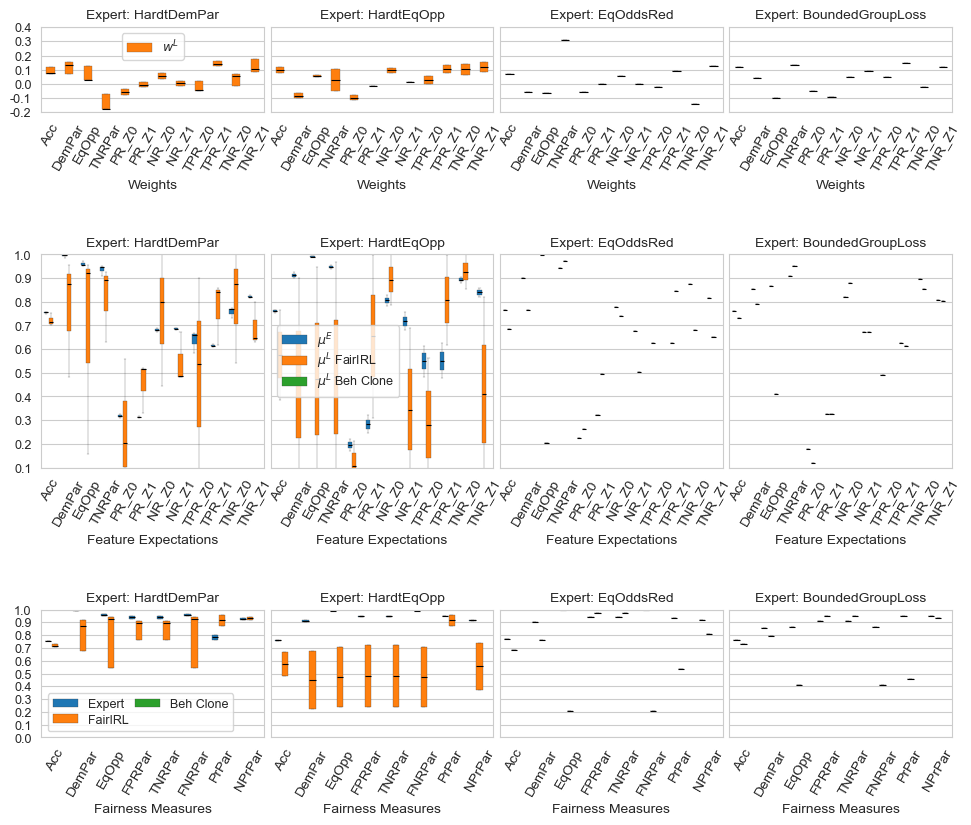

In [1731]:
# For folding
size_mult = 1.0
plt.rc('axes', titlesize=10*size_mult)     # fontsize of the axes title
plt.rc('axes', labelsize=10*size_mult, titlesize=10*size_mult)    # fontsize of the x and y axes labels
plt.rc('xtick', labelsize=10*size_mult)    # fontsize of the tick labels
plt.rc('ytick', labelsize=9*size_mult)    # fontsize of the tick labels
plt.rc('legend', fontsize=9*size_mult)    # legend fontsize
sns.set_style('whitegrid')

print('Experiment ID:', exp_info['EXPERIMENT_NAME'])
    
fig, axes, mu_dfs, w_dfs, perf_dfs = plot_results_source_domain_only(
    feat_objective_set_names=exp_info['FEAT_EXP_OBJECTIVE_NAMES'],
#     perf_objective_set_names=exp_info['PERF_MEAS_OBJECTIVE_NAMES'],
    perf_objective_set_names=[
        'Acc',
        'DemPar',
        'EqOpp',
        'FPRPar',
        'TNRPar',
        'FNRPar',
        'PredPar',
        'NegPredPar',
    ],
#     expert_algos=np.unique([exp['EXPERT_ALGO'] for exp in experiments]),
    expert_algos=[
#         'OptAcc',
        'HardtDemPar',
        'HardtEqOpp',
#         'HardtFPRPar',
#         'HardtFNRPar',
        'HardtEqOdds',
        'BoundedGroupLoss',
#         'COMPAS',
    ],
#     dataset=exp_info['DATASET'],
    dataset=None,
#     mu_noise_factor=.1,
    perf_noise_factor=0,
    w_noise_factor=0,
    mu_hue_order=[
        'muE',
        'muL (FairIRL)',
        'muL (Beh Clone)',
#         None,
#         None,
#         'muL (FairIRLFO)',
    ],
    perf_hue_order=[
        'Expert',
        'Learned (FairIRL)',
        'Learned (Beh Clone)',
#         None,
#         None,
    ],
    w_hue_order=[
#         None,
        'wL (FairIRL)',
#         None,
#         'wL (FairIRLFO)',
    ],
    extra_skip_conditions=skip_by_name,
    min_exp_timestamp=min_exp_timestamp,
#     max_mu_value=1,
#     min_w_value=-.05,
    mu_yticks=np.linspace(0, 1, 11).round(1),
    mu_ylim=(.1, 1.0),
    mu_whis=[0, 100],
    w_yticks = np.linspace(-1, 1, 21).round(2),
    w_ylim=(-.2, .4),
    w_whis=[1, 99],
    w_palette=[cp[1]],
    perf_ylim=(0, 1.0),
    perf_yticks=np.linspace(0, 1, 11).round(2),
    perf_whis=[1, 99],
#     min_perf_value=.6,
    size_mult=size_mult,
    figsize=(10, 8),
    palette=cp,
    mu_leg_ax=1,
    perf_leg_ax=0,
)

rotation = 60
if len(np.shape(axes)) > 1:
    for ax_i, _ in enumerate(axes[0]):
        axes[0][ax_i].tick_params(axis='x', rotation=rotation)
        axes[1][ax_i].tick_params(axis='x', rotation=rotation)
        axes[2][ax_i].tick_params(axis='x', rotation=rotation)
else:
    axes[0].tick_params(axis='x', rotation=rotation)
    axes[1].tick_params(axis='x', rotation=rotation)
    axes[2].tick_params(axis='x', rotation=rotation)
    
    
# axes[1][0].legend(labels=['$w^L$'])
axes[0][0].get_legend().get_texts()[0].set_text('$w^L$')

for i, label in enumerate(axes[1][1].get_legend().get_texts()):
    text = label.get_text()
    label.set_text(text.replace('(', '').replace(')', ''))
    

for i, label in enumerate(axes[2][0].get_legend().get_texts()):
    text = label.get_text()
    label.set_text(text.replace('Learned (', '').replace(')', ''))
    

for ax_i, ax in enumerate(axes):
    for plot_i, plot in enumerate(ax):
        title = plot.get_title()
        plot.set_title(title.replace('HardtEqOdds', 'EqOddsRed'))    

for i, _ in enumerate(axes[0]):
    labels = [item.get_text() for item in axes[0][i].get_xticklabels()]
#     labels[1] = labels[1].replace('DemPar', 'PRPar')
#     labels[2] = labels[2].replace('EqOpp', 'TPRPar')
    axes[0][i].set_xticklabels(labels)
    
for i, _ in enumerate(axes[1]):
    labels = [item.get_text() for item in axes[0][i].get_xticklabels()]
#     labels[1] = labels[1].replace('DemPar', 'PRPar')
#     labels[2] = labels[2].replace('EqOpp', 'TPRPar')
    axes[1][i].set_xticklabels(labels)

for i, _ in enumerate(axes[2]):
    labels = [item.get_text() for item in axes[2][i].get_xticklabels()]
#     labels[1] = labels[1].replace('DemPar', 'PRPar')
#     labels[2] = labels[2].replace('EqOpp', 'TPRPar')
    labels[-2] = labels[-2].replace('PredPar', 'PrPar')
    labels[-1] = labels[-1].replace('NegPredPar', 'NPrPar')
    axes[2][i].set_xticklabels(labels)

### Compare just IRL learned policies

Experiment ID: ACSIncome_MA_to_MS_jan8_44


ValueError: No results for provided config.

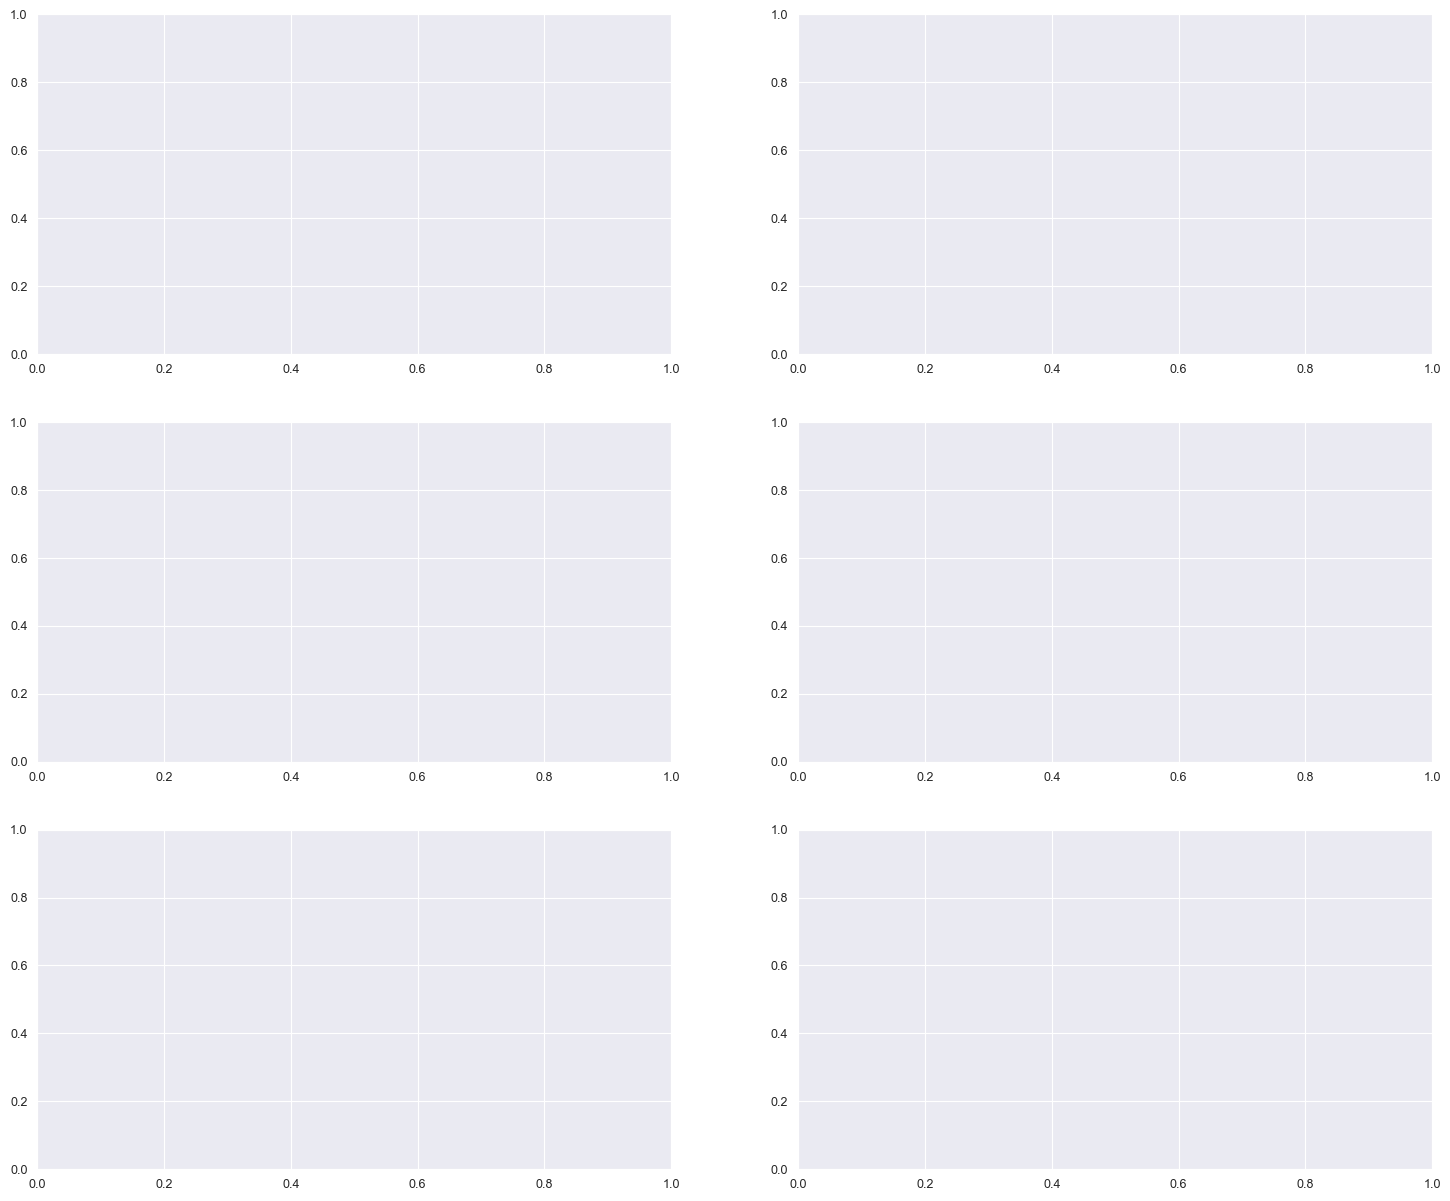

In [1507]:
size_mult = 1.5
plt.rc('axes', titlesize=6*size_mult)     # fontsize of the axes title
plt.rc('axes', labelsize=6*size_mult)    # fontsize of the x and y axes labels
plt.rc('xtick', labelsize=6*size_mult)    # fontsize of the tick labels
plt.rc('ytick', labelsize=6*size_mult)    # fontsize of the tick labels
plt.rc('legend', fontsize=5*size_mult)    # legend fontsize
plt.rc('figure', titlesize=9*size_mult)  # fontsize of the figure title

print('Experiment ID:', exp_info['EXPERIMENT_NAME'])
    
fig, axes, mu_dfs, w_dfs, perf_dfs = plot_source_fair_irl_comparisons(
    feat_objective_set_names=base_exp_info['FEAT_EXP_OBJECTIVE_NAMES'],
#     perf_objective_set_names=base_exp_info['PERF_MEAS_OBJECTIVE_NAMES'],
    perf_objective_set_names=[
        'Acc',
#         'AccPar',
        'DemPar',
        'EqOpp',
        'FPRPar',
        'TNRPar',
#         'FNRPar',
#         'PR_Z0',
#         'PR_Z1',
#         'NR_Z0',
#         'NR_Z1'
#         'TPR_Z0',
#         'TPR_Z1',
#         'TNR_Z0',
#         'TNR_Z1',
#         'FPR_Z0',
#         'FPR_Z1',
#         'FNR_Z0',
#         'FNR_Z1',
        'PredPar',
#         'OppPredPar',
    ],
    expert_algos=[
        'OptAcc',
#         'COMPAS',
        'HardtDemPar',
        'HardtEqOpp',
#         'HardtTNRPar',
#         'RedBoundedGroupLoss',
    ],
    dataset=exp_info['DATASET'],
    demo_producers=[
        'muE',  # source
        'muL (FairIRL)',  # source
    ],
    mu_noise_factor=0,
    perf_noise_factor=0,
    w_noise_factor=0,
    mu_hue_order=[
        'muE',
        'muL (FairIRL)',
        'muL (Beh Clone)',
#         None,
#         None,
#         'muL (FairIRLFO)',
    ],
    perf_hue_order=[
        'Expert',
        'Learned (FairIRL)',
        'Learned (Beh Clone)',
#         None,
#         None,
    ],
    w_hue_order=[
        None,
        'wL (FairIRL)',
#         None,
#         'wL (FairIRLFO)',
    ],
    extra_skip_conditions=skip_by_name,
    min_exp_timestamp=min_exp_timestamp,
    mu_yticks=np.linspace(0, 1, 11).round(1),
    mu_ylim=(0, 1.02),
    mu_whis=[1, 99],
    w_yticks = np.linspace(-1, 1, 21).round(1),
    w_ylim=(-.2, .32),
    perf_ylim=(.45, 1.05),
    perf_yticks=np.linspace(.5, 1, 6).round(1),
    size_mult=size_mult,
    palette=[cp[4], cp[9], cp[6], cp[8]],
    figsize=(18, 15),
)

rotation = 67.5
if len(np.shape(axes)) > 1:
    for ax_i, _ in enumerate(axes[0]):
        axes[0][ax_i].tick_params(axis='x', rotation=rotation)
        axes[1][ax_i].tick_params(axis='x', rotation=rotation)
        axes[2][ax_i].tick_params(axis='x', rotation=rotation)
else:
    axes[0].tick_params(axis='x', rotation=rotation)
    axes[1].tick_params(axis='x', rotation=rotation)
    axes[2].tick_params(axis='x', rotation=rotation)


# Compare results with target domain

### Compare each expert's demo vs learned

Experiment ID: adult_to_boston_error_inc_stop_56
2024-01-21 19:28:08.csv HardtDemPar FairIRL 1 result rows
2024-01-21 19:31:48.csv HardtDemPar FairIRL 1 result rows
2024-01-21 19:35:17.csv HardtDemPar FairIRL 3 result rows
2024-01-21 19:28:31.csv HardtEqOpp Beh Clone 1 result rows
2024-01-21 19:32:02.csv HardtEqOpp FairIRL 0 result rows
2024-01-21 19:35:51.csv HardtEqOpp FairIRL 2 result rows
2024-01-21 19:32:20.csv HardtEqOdds FairIRL 1 result rows
2024-01-21 19:36:18.csv HardtEqOdds FairIRL 0 result rows
2024-01-21 19:32:43.csv BoundedGroupLoss FairIRL 1 result rows
2024-01-21 19:37:03.csv BoundedGroupLoss FairIRL 0 result rows
SOURCE DATASET: Adult
TARGET DATASET: Boston


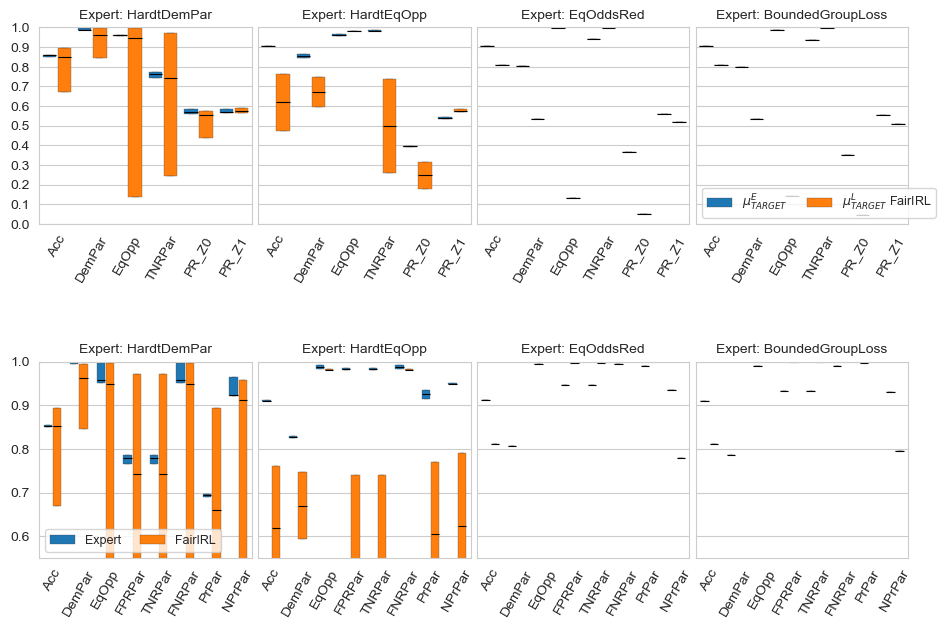

In [1712]:
## plt.rc('axes', titlesize=11)     # fontsize of the axes title
size_mult = 1.
sns.set_style('whitegrid')
plt.rc('axes', titlesize=10*size_mult)     # fontsize of the axes title
plt.rc('axes', labelsize=10*size_mult)    # fontsize of the x and y axes labels
plt.rc('xtick', labelsize=10*size_mult)    # fontsize of the tick labels
plt.rc('ytick', labelsize=10*size_mult)    # fontsize of the tick labels
plt.rc('legend', fontsize=9*size_mult)    # legend fontsize
plt.rc('figure', titlesize=10*size_mult)  # fontsize of the figure title

print('Experiment ID:', exp_info['EXPERIMENT_NAME'])

fig, axes, mu_dfs, w_dfs, perf_dfs = plot_results_target_domain(
    feat_objective_set_names=exp_info['FEAT_EXP_OBJECTIVE_NAMES'],
#     perf_objective_set_names=base_exp_info['PERF_MEAS_OBJECTIVE_NAMES'],
    perf_objective_set_names=[
        'Acc',
        'DemPar',
        'EqOpp',
        'FPRPar',
        'TNRPar',
        'FNRPar',
#         'PR_Z0',
#         'PR_Z1',
#         'NR_Z0',
#         'NR_Z1'
#         'TPR_Z0',
#         'TPR_Z1',
#         'TNR_Z0',
#         'TNR_Z1',
#         'FPR_Z0',
#         'FPR_Z1',
#         'FNR_Z0',
#         'FNR_Z1',
        'PredPar',
        'NegPredPar',
    ],
#     expert_algos=np.unique([exp['EXPERT_ALGO'] for exp in experiments]),
    expert_algos=[
#         'OptAcc',
        'HardtDemPar',
        'HardtEqOpp',
        'HardtEqOdds',
        'BoundedGroupLoss',
#         'COMPAS',
    ],
    source_dataset=experiments[-1]['DATASET'],
    target_dataset=experiments[-1]['TARGET_DATASET'],
#     source_dataset=None,
#     target_dataset=None,
    mu_noise_factor=0,
    extra_skip_conditions=skip_by_name,
    min_exp_timestamp=min_exp_timestamp,
    mu_yticks=np.linspace(0, 1, 11).round(1),
    mu_ylim=(0, 1.0),
    mu_whis=[1, 99],
    perf_noise_factor=0,
    perf_ylim=(.55, 1),
    perf_yticks=np.linspace(0, 1, 11).round(2),
    size_mult=size_mult,
    mu_hue_order=[  
#         'muE',
        'muE_target',
#         'muL (FairIRL)',
#         'muL (FairIRLFO)',
        'muL_target FairIRL',

    ],
    perf_hue_order=[
#         'Expert (source)',
        'Expert (target)',
        'FairIRL Learned (target)',
#         'Beh Clone Learned (target)',
    ],
    figsize=(10, 6),
    perf_leg_ax=0,
)

rotation = 60
if len(np.shape(axes)) > 1:
    for ax_i, _ in enumerate(axes[0]):
        axes[0][ax_i].tick_params(axis='x', rotation=rotation)
        axes[1][ax_i].tick_params(axis='x', rotation=rotation)
else:
    axes[0].tick_params(axis='x', rotation=rotation)
    axes[1].tick_params(axis='x', rotation=rotation)
    
    
for i, label in enumerate(axes[1][0].get_legend().get_texts()):
    text = label.get_text()
    label.set_text(text.replace(' (target)', '').replace(' Learned', ''))
    
for i, _ in enumerate(axes[0]):
    labels = [item.get_text() for item in axes[0][i].get_xticklabels()]
#     labels[1] = labels[1].replace('DemPar', 'PRPar')
#     labels[2] = labels[2].replace('EqOpp', 'TPRPar')
    axes[0][i].set_xticklabels(labels)
    
for i, _ in enumerate(axes[1]):
    labels = [item.get_text() for item in axes[1][i].get_xticklabels()]
#     labels[1] = labels[1].replace('DemPar', 'PRPar')
#     labels[2] = labels[2].replace('EqOpp', 'TPRPar')
    labels[-2] = labels[-2].replace('PredPar', 'PrPar')
    labels[-1] = labels[-1].replace('NegPredPar', 'NPrPar')
    axes[1][i].set_xticklabels(labels)
    
for ax_i, ax in enumerate(axes):
    for plot_i, plot in enumerate(ax):
        title = plot.get_title()
        plot.set_title(title.replace('HardtEqOdds', 'EqOddsRed'))   

### Compare just IRL learned policies

Experiment ID: adult_to_boston_jan8_44


ValueError: No results for provided config.

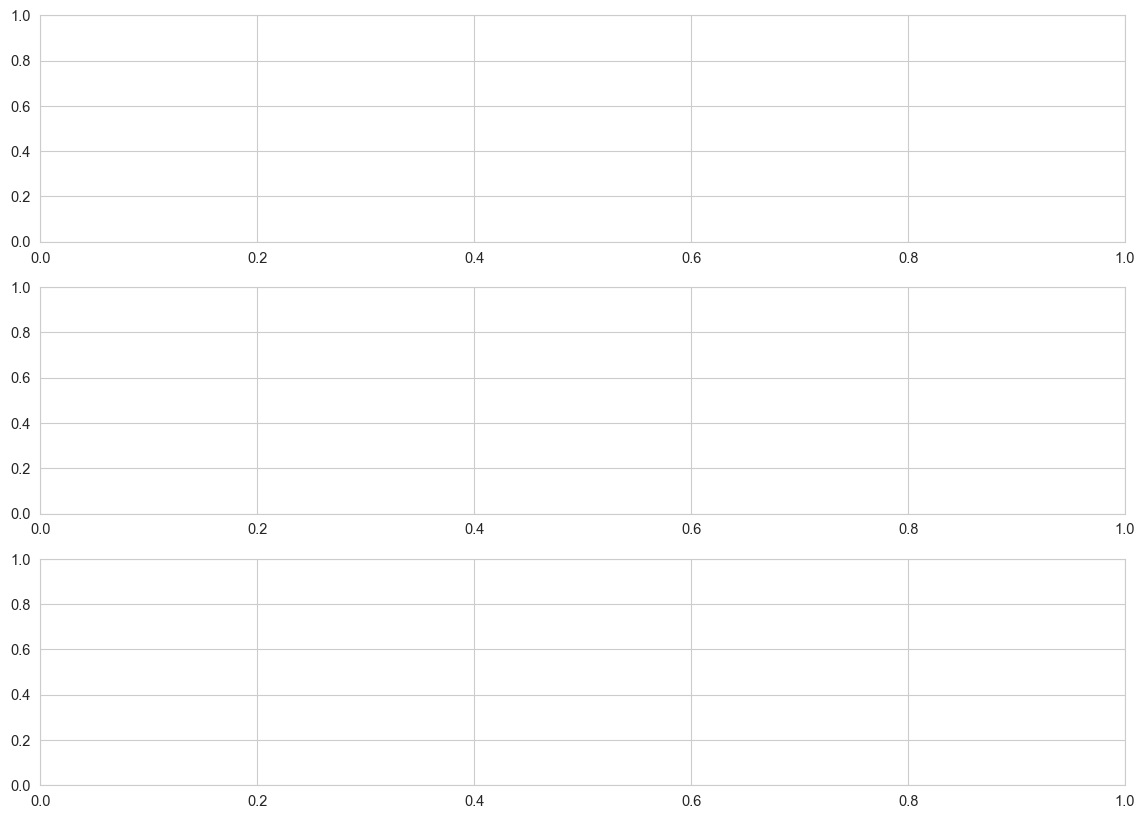

In [1866]:
size_mult = 1.5
plt.rc('axes', titlesize=9*size_mult)     # fontsize of the axes title
plt.rc('axes', labelsize=9*size_mult)    # fontsize of the x and y axes labels
plt.rc('xtick', labelsize=7*size_mult)    # fontsize of the tick labels
plt.rc('ytick', labelsize=7*size_mult)    # fontsize of the tick labels
plt.rc('legend', fontsize=6*size_mult)    # legend fontsize
plt.rc('figure', titlesize=9*size_mult)  # fontsize of the figure title

print('Experiment ID:', exp_info['EXPERIMENT_NAME'])
    
fig, axes, mu_dfs, w_dfs, perf_dfs = plot_target_fair_irl_comparisons(
    feat_objective_set_names=exp_info['FEAT_EXP_OBJECTIVE_NAMES'],
    perf_objective_set_names=exp_info['PERF_MEAS_OBJECTIVE_NAMES'],
    expert_algos=[
        'OptAcc',
        'COMPAS',
        'HardtDemPar',
        'HardtEqOpp',
#         'HardtTNRPar',
#         'RedBoundedGroupLoss',
    ],
    dataset=exp_info['DATASET'],
    feat_demo_producers=[
#         'muE',
#         'muE_target',
#         'muL_source FairIRL',
        'muL_target FairIRL',
    ],
    perf_demo_producers=[
        'Acc',
#         'AccPar',
        'DemPar',
        'EqOpp',
        'FPRPar',
        'TNRPar',
#         'FNRPar',
#         'PR_Z0',
#         'PR_Z1',
#         'NR_Z0',
#         'NR_Z1'
#         'TPR_Z0',
#         'TPR_Z1',
#         'TNR_Z0',
#         'TNR_Z1',
#         'FPR_Z0',
#         'FPR_Z1',
#         'FNR_Z0',
#         'FNR_Z1',
        'PredPar',
#         'OppPredPar',
    ],
    w_demo_producers=[
      'wL (FairIRL)',
    ],
    mu_noise_factor=.001,
    perf_noise_factor=.001,
    w_noise_factor=.001,
    mu_hue_order=[
        'muE',
        'muL (FairIRL)',
        'muL (Beh Clone)',
#         None,
#         None,
#         'muL (FairIRLFO)',
    ],
    perf_hue_order=['muE', 'muL (FairIRL)', 'muL (FairIRLFO)'],
    w_hue_order=[None, 'wL (FairIRL)', 'wL (FairIRLFO)'],
    extra_skip_conditions=skip_by_name,
    min_exp_timestamp=min_exp_timestamp,
    max_mu_value=1,
    min_w_value=-.05,
    mu_yticks=np.linspace(0, 1, 11).round(1),
    mu_ylim=(0, 1.05),
    mu_whis=[1, 99],
    w_yticks = np.linspace(-1, 1, 101).round(1),
    w_ylim=(-.05, .35),
    perf_ylim=(.45, 1.05),
    perf_yticks=np.linspace(0, 1, 11).round(1),
    size_mult=size_mult,
    figsize=(14, 10)
)
print(f"Source Dataset: {exp_info['DATASET']}")
print(f"Target Dataset: {exp_info['TARGET_DATASET']}")

# Convergence

In [1484]:
def plot_error_vs_number_iters():
    """
    Plots the error (Euclidean distance between muE and muL) versus
    the number of IRL iterations.
    """
    path_prefix = './../../data/experiment_output/fair_irl/'
    exp_info_files = sorted(os.listdir(f"{path_prefix}/exp_info/"))
    exp_conv_files = sorted(os.listdir(f"{path_prefix}/exp_conv_details/"))
    
    first_conv_file = exp_conv_files[0].replace('csv', '').split('__', 1)[0]
    
    # Started logging conv files after info files, so need to find the point where started logging both.
    info_file_offset = 0
    for i, info_file in enumerate(exp_info_files):
        if info_file.replace('json', '') == first_conv_file:
            info_file_offset = i
            break
    
    conv_files = []
    
    for conv_file in exp_conv_files:
        conv = pd.read_csv(
            f"{path_prefix}/exp_conv_details/{conv_file}",
            index_col=None,
        )
        # info = json.load(open(f"{path_prefix}/exp_info/{info_file}"))
        display(conv)
        conv_files.append(conv)
        
    conv_files = pd.concat(conv_files)
    
    # Plot
    fig, ax = plt.subplots(1, 1, figsize=(7, 5))
    itergroups = (
        conv_files
        .groupby(['learn_idx'])[['mu_delta_l2norm']]
        .agg(['count', 'mean', 'median'])
        ['mu_delta_l2norm']
        .reset_index()
    )
    display(itergroups)
    itergroups = itergroups.query('learn_idx >= 0')
    ax.scatter(itergroups['learn_idx'], itergroups['mean'])


,Acc,DemPar,EqOpp,TNRPar,PR_Z0,PR_Z1,NR_Z0,NR_Z1,TPR_Z0,TPR_Z1,TNR_Z0,TNR_Z1,is_expert,muL_best_Acc,muL_hold_Acc,muL_best_hold_Acc,muL_best_DemPar,muL_hold_DemPar,muL_best_hold_DemPar,muL_best_EqOpp,muL_hold_EqOpp,muL_best_hold_EqOpp,muL_best_TNRPar,muL_hold_TNRPar,muL_best_hold_TNRPar,muL_best_PR_Z0,muL_hold_PR_Z0,muL_best_hold_PR_Z0,muL_best_PR_Z1,muL_hold_PR_Z1,muL_best_hold_PR_Z1,muL_best_NR_Z0,muL_hold_NR_Z0,muL_best_hold_NR_Z0,muL_best_NR_Z1,muL_hold_NR_Z1,muL_best_hold_NR_Z1,muL_best_TPR_Z0,muL_hold_TPR_Z0,muL_best_hold_TPR_Z0,muL_best_TPR_Z1,muL_hold_TPR_Z1,muL_best_hold_TPR_Z1,muL_best_TNR_Z0,muL_hold_TNR_Z0,muL_best_hold_TNR_Z0,muL_best_TNR_Z1,muL_hold_TNR_Z1,muL_best_hold_TNR_Z1,muL_perf_best_hold_Acc,muL_perf_best_hold_DemPar,muL_perf_best_hold_EqOpp,muL_perf_best_hold_FPRPar,muL_perf_best_hold_TNRPar,muL_perf_best_hold_FNRPar,muL_perf_best_hold_PredPar,muL_perf_best_hold_NegPredPar,is_init_policy,learn_idx,Acc_weight,DemPar_weight,EqOpp_weight,TNRPar_weight,PR_Z0_weight,PR_Z1_weight,NR_Z0_weight,NR_Z1_weight,TPR_Z0_weight,TPR_Z1_weight,TNR_Z0_weight,TNR_Z1_weight,t,t_hold,mu_delta_l2norm,mu_delta_l2norm_hold
0,0.745590,0.980956,0.979803,0.911760,0.327357,0.308313,0.672643,0.691687,0.576052,0.596249,0.736842,0.825082,1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,-1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,inf,inf,0.000000,0.000000
1,0.641871,0.876403,0.985268,0.870755,0.285418,0.409015,0.714582,0.590985,0.570447,0.555715,0.786332,0.657088,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,inf,inf,0.000000,0.000000
2,0.706517,0.756616,0.342466,0.858956,0.243384,0.000000,0.756616,1.000000,0.657534,0.000000,0.858956,1.000000,0,0.706517,0.704543,0.704543,0.756616,0.775387,0.775387,0.342466,0.362745,0.362745,0.858956,0.863257,0.863257,0.243384,0.224613,0.224613,0.000000,0.000000,0.000000,0.756616,0.775387,0.775387,1.000000,1.000000,1.000000,0.657534,0.637255,0.637255,0.000000,0.000000,0.000000,0.858956,0.863257,0.863257,1.000000,1.000000,1.000000,0.704543,0.775387,0.362745,0.863257,0.863257,0.362745,1.000000,0.766154,0.0,1.0,0.129061,0.130097,-0.006801,0.051023,0.052186,-0.125306,-0.052186,0.125306,0.006974,0.050438,-0.061582,0.209040,0.141019,0.141019,1.689381,1.694416
3,0.751566,0.989316,0.995199,0.924984,0.334087,0.323403,0.665913,0.676597,0.633562,0.628760,0.739915,0.814932,0,0.751566,0.746299,0.746299,0.989316,0.999206,0.999206,0.995199,0.961185,0.961185,0.924984,0.936897,0.936897,0.334087,0.321859,0.321859,0.323403,0.322652,0.322652,0.665913,0.678141,0.678141,0.676597,0.677348,0.677348,0.633562,0.651961,0.651961,0.628760,0.613146,0.613146,0.739915,0.748434,0.748434,0.814932,0.811538,0.811538,0.746299,0.999206,0.961185,0.936897,0.936897,0.961185,0.755155,0.909637,0.0,2.0,0.120528,0.141830,0.063945,0.051757,0.056231,-0.078955,-0.056231,0.078955,-0.002677,0.110976,-0.068886,0.169031,0.132188,0.132188,0.130756,0.038780
4,0.675293,0.785795,0.979452,0.737941,0.214205,0.000000,0.785795,1.000000,0.020548,0.000000,0.737941,1.000000,0,0.675293,0.673668,0.673668,0.785795,0.782272,0.782272,0.979452,0.980392,0.980392,0.737941,0.740084,0.740084,0.214205,0.2

,Acc,DemPar,EqOpp,TNRPar,PR_Z0,PR_Z1,NR_Z0,NR_Z1,TPR_Z0,TPR_Z1,TNR_Z0,TNR_Z1,is_expert,muL_best_Acc,muL_hold_Acc,muL_best_hold_Acc,muL_best_DemPar,muL_hold_DemPar,muL_best_hold_DemPar,muL_best_EqOpp,muL_hold_EqOpp,muL_best_hold_EqOpp,muL_best_TNRPar,muL_hold_TNRPar,muL_best_hold_TNRPar,muL_best_PR_Z0,muL_hold_PR_Z0,muL_best_hold_PR_Z0,muL_best_PR_Z1,muL_hold_PR_Z1,muL_best_hold_PR_Z1,muL_best_NR_Z0,muL_hold_NR_Z0,muL_best_hold_NR_Z0,muL_best_NR_Z1,muL_hold_NR_Z1,muL_best_hold_NR_Z1,muL_best_TPR_Z0,muL_hold_TPR_Z0,muL_best_hold_TPR_Z0,muL_best_TPR_Z1,muL_hold_TPR_Z1,muL_best_hold_TPR_Z1,muL_best_TNR_Z0,muL_hold_TNR_Z0,muL_best_hold_TNR_Z0,muL_best_TNR_Z1,muL_hold_TNR_Z1,muL_best_hold_TNR_Z1,muL_perf_best_hold_Acc,muL_perf_best_hold_DemPar,muL_perf_best_hold_EqOpp,muL_perf_best_hold_FPRPar,muL_perf_best_hold_TNRPar,muL_perf_best_hold_FNRPar,muL_perf_best_hold_PredPar,muL_perf_best_hold_NegPredPar,is_init_policy,learn_idx,Acc_weight,DemPar_weight,EqOpp_weight,TNRPar_weight,PR_Z0_weight,PR_Z1_weight,NR_Z0_weight,NR_Z1_weight,TPR_Z0_weight,TPR_Z1_weight,TNR_Z0_weight,TNR_Z1_weight,t,t_hold,mu_delta_l2norm,mu_delta_l2norm_hold
0,0.754793,0.989206,0.911583,0.936869,0.330458,0.319664,0.669542,0.680336,0.710623,0.622206,0.753647,0.816778,1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,-1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,inf,inf,0.000000,0.000000
1,0.644268,0.858156,0.913110,0.880925,0.267206,0.409050,0.732794,0.590950,0.477778,0.564668,0.779703,0.660628,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,inf,inf,0.000000,0.000000
2,0.717779,0.623163,0.654777,0.551868,0.695758,0.318921,0.304242,0.681079,0.965831,0.620608,0.369655,0.817787,0,0.717779,0.716184,0.716184,0.623163,0.630021,0.630021,0.654777,0.675161,0.675161,0.551868,0.549874,0.549874,0.695758,0.691529,0.691529,0.318921,0.321549,0.321549,0.304242,0.308471,0.308471,0.681079,0.678451,0.678451,0.965831,0.945545,0.945545,0.620608,0.620706,0.620706,0.369655,0.366516,0.366516,0.817787,0.816642,0.816642,0.716184,0.630021,0.675161,0.549874,0.549874,0.675161,0.644382,0.856187,0.0,1.0,0.102632,0.121690,-0.001418,0.051949,0.058734,-0.083003,-0.058734,0.083003,0.216215,0.053429,-0.024195,0.144998,0.186475,0.186475,1.515201,1.591550
3,0.761879,0.993093,0.844982,0.982489,0.312014,0.318921,0.687986,0.681079,0.775626,0.620608,0.800276,0.817787,0,0.761879,0.759585,0.759585,0.993093,0.976793,0.976793,0.844982,0.883082,0.883082,0.982489,0.985395,0.985395,0.312014,0.298343,0.298343,0.318921,0.321549,0.321549,0.687986,0.701657,0.701657,0.681079,0.678451,0.678451,0.775626,0.737624,0.737624,0.620608,0.620706,0.620706,0.800276,0.802036,0.802036,0.817787,0.816642,0.816642,0.759585,0.976793,0.883082,0.985395,0.985395,0.883082,0.849931,0.892905,0.0,2.0,0.101448,0.177909,0.044624,0.116862,-0.011071,-0.076558,0.011071,0.076558,0.154127,0.049652,0.046327,0.133792,0.164118,0.164118,0.154586,0.203025
4,0.626953,0.345400,0.843531,0.217468,0.687986,0.033386,0.312014,0.966614,0.224374,0.067905,0.199724,0.982256,0,0.626953,0.622801,0.622801,0.345400,0.331348,0.331348,0.843531,0.797048,0.797048,0.217468,0.218766,0.218766,0.687986,0.701

,Acc,DemPar,EqOpp,TNRPar,PR_Z0,PR_Z1,NR_Z0,NR_Z1,TPR_Z0,TPR_Z1,TNR_Z0,TNR_Z1,is_expert,muL_best_Acc,muL_hold_Acc,muL_best_hold_Acc,muL_best_DemPar,muL_hold_DemPar,muL_best_hold_DemPar,muL_best_EqOpp,muL_hold_EqOpp,muL_best_hold_EqOpp,muL_best_TNRPar,muL_hold_TNRPar,muL_best_hold_TNRPar,muL_best_PR_Z0,muL_hold_PR_Z0,muL_best_hold_PR_Z0,muL_best_PR_Z1,muL_hold_PR_Z1,muL_best_hold_PR_Z1,muL_best_NR_Z0,muL_hold_NR_Z0,muL_best_hold_NR_Z0,muL_best_NR_Z1,muL_hold_NR_Z1,muL_best_hold_NR_Z1,muL_best_TPR_Z0,muL_hold_TPR_Z0,muL_best_hold_TPR_Z0,muL_best_TPR_Z1,muL_hold_TPR_Z1,muL_best_hold_TPR_Z1,muL_best_TNR_Z0,muL_hold_TNR_Z0,muL_best_hold_TNR_Z0,muL_best_TNR_Z1,muL_hold_TNR_Z1,muL_best_hold_TNR_Z1,muL_perf_best_hold_Acc,muL_perf_best_hold_DemPar,muL_perf_best_hold_EqOpp,muL_perf_best_hold_FPRPar,muL_perf_best_hold_TNRPar,muL_perf_best_hold_FNRPar,muL_perf_best_hold_PredPar,muL_perf_best_hold_NegPredPar,is_init_policy,learn_idx,Acc_weight,DemPar_weight,EqOpp_weight,TNRPar_weight,PR_Z0_weight,PR_Z1_weight,NR_Z0_weight,NR_Z1_weight,TPR_Z0_weight,TPR_Z1_weight,TNR_Z0_weight,TNR_Z1_weight,t,t_hold,mu_delta_l2norm,mu_delta_l2norm_hold
0,0.754793,0.979692,0.946899,0.926427,0.339419,0.319111,0.660581,0.680889,0.681979,0.628877,0.741639,0.815212,1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,-1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,inf,inf,0.000000,0.000000
1,0.646568,0.860539,0.993661,0.862999,0.272914,0.412375,0.727086,0.587625,0.561151,0.567490,0.794764,0.657763,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,inf,inf,0.000000,0.000000
2,0.636159,0.129822,0.005012,0.159134,0.870288,0.000111,0.129712,0.999889,0.995343,0.000356,0.159134,1.000000,0,0.636159,0.632165,0.632165,0.129822,0.125465,0.125465,0.005012,0.022624,0.022624,0.159134,0.152047,0.152047,0.870288,0.874535,0.874535,0.000111,0.000000,0.000000,0.129712,0.125465,0.125465,0.999889,1.000000,1.000000,0.995343,0.977376,0.977376,0.000356,0.000000,0.000000,0.159134,0.152047,0.152047,1.000000,1.000000,1.000000,0.632165,0.125465,0.022624,0.152047,0.152047,0.022624,1.000000,0.718156,0.0,1.0,0.103082,0.113491,-0.044540,0.060413,0.063344,-0.088832,-0.063344,0.088832,0.115086,0.058470,-0.050600,0.149967,0.161510,0.161510,2.939700,3.019762
3,0.757007,0.996714,0.843357,0.964225,0.351441,0.348155,0.648559,0.651845,0.821886,0.665243,0.759244,0.795019,0,0.757007,0.748070,0.748070,0.996714,0.999705,0.999705,0.843357,0.842710,0.842710,0.964225,0.978649,0.978649,0.351441,0.350372,0.350372,0.348155,0.350666,0.350666,0.648559,0.649628,0.649628,0.651845,0.649334,0.649334,0.821886,0.805430,0.805430,0.665243,0.648140,0.648140,0.759244,0.767251,0.767251,0.795019,0.788602,0.788602,0.748070,0.999705,0.842710,0.978649,0.978649,0.842710,0.882758,0.888722,0.0,2.0,0.114764,0.158844,-0.004725,0.098780,0.043249,-0.079871,-0.043249,0.079871,0.107990,0.090449,-0.027391,0.150819,0.155599,0.155599,0.268753,0.285682
4,0.656786,0.606752,0.995298,0.508018,0.425721,0.032472,0.574279,0.967528,0.071013,0.066311,0.490824,0.982807,0,0.656786,0.651651,0.651651,0.606752,0.618166,0.618166,0.995298,0.997662,0.997662,0.508018,0.511941,0.511941,0.425721,0.4

,Acc,DemPar,EqOpp,TNRPar,PR_Z0,PR_Z1,NR_Z0,NR_Z1,TPR_Z0,TPR_Z1,TNR_Z0,TNR_Z1,is_expert,muL_best_Acc,muL_hold_Acc,muL_best_hold_Acc,muL_best_DemPar,muL_hold_DemPar,muL_best_hold_DemPar,muL_best_EqOpp,muL_hold_EqOpp,muL_best_hold_EqOpp,muL_best_TNRPar,muL_hold_TNRPar,muL_best_hold_TNRPar,muL_best_PR_Z0,muL_hold_PR_Z0,muL_best_hold_PR_Z0,muL_best_PR_Z1,muL_hold_PR_Z1,muL_best_hold_PR_Z1,muL_best_NR_Z0,muL_hold_NR_Z0,muL_best_hold_NR_Z0,muL_best_NR_Z1,muL_hold_NR_Z1,muL_best_hold_NR_Z1,muL_best_TPR_Z0,muL_hold_TPR_Z0,muL_best_hold_TPR_Z0,muL_best_TPR_Z1,muL_hold_TPR_Z1,muL_best_hold_TPR_Z1,muL_best_TNR_Z0,muL_hold_TNR_Z0,muL_best_hold_TNR_Z0,muL_best_TNR_Z1,muL_hold_TNR_Z1,muL_best_hold_TNR_Z1,muL_perf_best_hold_Acc,muL_perf_best_hold_DemPar,muL_perf_best_hold_EqOpp,muL_perf_best_hold_FPRPar,muL_perf_best_hold_TNRPar,muL_perf_best_hold_FNRPar,muL_perf_best_hold_PredPar,muL_perf_best_hold_NegPredPar,is_init_policy,learn_idx,Acc_weight,DemPar_weight,EqOpp_weight,TNRPar_weight,PR_Z0_weight,PR_Z1_weight,NR_Z0_weight,NR_Z1_weight,TPR_Z0_weight,TPR_Z1_weight,TNR_Z0_weight,TNR_Z1_weight,t,t_hold,mu_delta_l2norm,mu_delta_l2norm_hold
0,0.757285,0.987605,0.954974,0.933730,0.316080,0.303685,0.683920,0.696315,0.649635,0.604609,0.761702,0.827972,1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,-1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,inf,inf,0.000000,0.000000
1,0.643692,0.890909,0.981684,0.897208,0.297131,0.406222,0.702869,0.593778,0.577519,0.559203,0.762852,0.660061,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,inf,inf,0.000000,0.000000
2,0.703037,0.657483,0.192231,0.772032,0.342628,0.000111,0.657372,0.999889,0.808126,0.000357,0.772032,1.000000,0,0.703037,0.688093,0.688093,0.657483,0.651859,0.651859,0.192231,0.175258,0.175258,0.772032,0.753575,0.753575,0.342628,0.348141,0.348141,0.000111,0.000000,0.000000,0.657372,0.651859,0.651859,0.999889,1.000000,1.000000,0.808126,0.824742,0.824742,0.000357,0.000000,0.000000,0.772032,0.753575,0.753575,1.000000,1.000000,1.000000,0.688093,0.651859,0.175258,0.753575,0.753575,0.175258,1.000000,0.722729,0.0,1.0,0.141447,0.120407,-0.033260,0.045477,0.023595,-0.127681,-0.023595,0.127681,0.089799,0.056539,-0.001432,0.209086,0.142744,0.142744,1.756241,1.781844
3,0.763651,0.996224,0.846210,0.981071,0.312514,0.316290,0.687486,0.683710,0.774266,0.620476,0.801223,0.820153,0,0.763651,0.756422,0.756422,0.996224,0.982711,0.982711,0.846210,0.842855,0.842855,0.981071,0.976032,0.976032,0.312514,0.310063,0.310063,0.316290,0.327353,0.327353,0.687486,0.689937,0.689937,0.683710,0.672647,0.672647,0.774266,0.778351,0.778351,0.620476,0.621205,0.621205,0.801223,0.789879,0.789879,0.820153,0.813847,0.813847,0.756422,0.982711,0.842855,0.976032,0.976032,0.842855,0.825618,0.873732,0.0,2.0,0.141451,0.153268,0.056482,0.062172,0.019477,-0.086887,-0.019477,0.086887,0.067475,0.123957,-0.002564,0.179904,0.131929,0.131929,0.241184,0.242600
4,0.642645,0.488049,0.952195,0.366919,0.544501,0.032551,0.455499,0.967449,0.113995,0.066190,0.349458,0.982539,0,0.642645,0.635708,0.635708,0.488049,0.492008,0.492008,0.952195,0.947596,0.947596,0.366919,0.385748,0.385748,0.544501,0.54

,Acc,DemPar,EqOpp,TNRPar,PR_Z0,PR_Z1,NR_Z0,NR_Z1,TPR_Z0,TPR_Z1,TNR_Z0,TNR_Z1,is_expert,muL_best_Acc,muL_hold_Acc,muL_best_hold_Acc,muL_best_DemPar,muL_hold_DemPar,muL_best_hold_DemPar,muL_best_EqOpp,muL_hold_EqOpp,muL_best_hold_EqOpp,muL_best_TNRPar,muL_hold_TNRPar,muL_best_hold_TNRPar,muL_best_PR_Z0,muL_hold_PR_Z0,muL_best_hold_PR_Z0,muL_best_PR_Z1,muL_hold_PR_Z1,muL_best_hold_PR_Z1,muL_best_NR_Z0,muL_hold_NR_Z0,muL_best_hold_NR_Z0,muL_best_NR_Z1,muL_hold_NR_Z1,muL_best_hold_NR_Z1,muL_best_TPR_Z0,muL_hold_TPR_Z0,muL_best_hold_TPR_Z0,muL_best_TPR_Z1,muL_hold_TPR_Z1,muL_best_hold_TPR_Z1,muL_best_TNR_Z0,muL_hold_TNR_Z0,muL_best_hold_TNR_Z0,muL_best_TNR_Z1,muL_hold_TNR_Z1,muL_best_hold_TNR_Z1,muL_perf_best_hold_Acc,muL_perf_best_hold_DemPar,muL_perf_best_hold_EqOpp,muL_perf_best_hold_FPRPar,muL_perf_best_hold_TNRPar,muL_perf_best_hold_FNRPar,muL_perf_best_hold_PredPar,muL_perf_best_hold_NegPredPar,is_init_policy,learn_idx,Acc_weight,DemPar_weight,EqOpp_weight,TNRPar_weight,PR_Z0_weight,PR_Z1_weight,NR_Z0_weight,NR_Z1_weight,TPR_Z0_weight,TPR_Z1_weight,TNR_Z0_weight,TNR_Z1_weight,t,t_hold,mu_delta_l2norm,mu_delta_l2norm_hold
0,0.753355,0.992772,0.944227,0.950554,0.311585,0.318813,0.688415,0.681187,0.672932,0.617159,0.766181,0.815627,1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,-1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,inf,inf,0.000000,0.000000
1,0.634682,0.898436,0.955769,0.900688,0.311333,0.412897,0.688667,0.587103,0.594891,0.550659,0.752039,0.652727,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,inf,inf,0.000000,0.000000
2,0.703353,0.697717,0.220211,0.809103,0.302393,0.000111,0.697607,0.999889,0.780142,0.000353,0.809103,1.000000,0,0.703353,0.701379,0.701379,0.697717,0.676233,0.676233,0.220211,0.273504,0.273504,0.809103,0.783201,0.783201,0.302393,0.323767,0.323767,0.000111,0.000000,0.000000,0.697607,0.676233,0.676233,0.999889,1.000000,1.000000,0.780142,0.726496,0.726496,0.000353,0.000000,0.000000,0.809103,0.783201,0.783201,1.000000,1.000000,1.000000,0.701379,0.676233,0.273504,0.783201,0.783201,0.273504,1.000000,0.774775,0.0,1.0,0.151239,0.120223,-0.014709,0.063550,0.000320,-0.119903,-0.000320,0.119903,0.099458,0.084749,0.018023,0.207602,0.141911,0.141911,1.732212,1.711472
3,0.763682,0.995770,0.818659,0.969236,0.322076,0.317845,0.677924,0.682155,0.803783,0.622442,0.790345,0.821109,0,0.763682,0.751234,0.751234,0.995770,0.979451,0.979451,0.818659,0.861165,0.861165,0.969236,0.957145,0.957145,0.322076,0.341704,0.341704,0.317845,0.321155,0.321155,0.677924,0.658296,0.658296,0.682155,0.678845,0.678845,0.803783,0.752137,0.752137,0.622442,0.613302,0.613302,0.790345,0.767310,0.767310,0.821109,0.810164,0.810164,0.751234,0.979451,0.861165,0.957145,0.957145,0.861165,0.869740,0.902370,0.0,2.0,0.147327,0.142290,0.057549,0.073783,0.001208,-0.081464,-0.001208,0.081464,0.083070,0.140619,0.012736,0.177282,0.134629,0.134629,0.242009,0.197165
4,0.704271,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0,0.704271,0.704036,0.704036,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.0000

,Acc,DemPar,EqOpp,TNRPar,PR_Z0,PR_Z1,NR_Z0,NR_Z1,TPR_Z0,TPR_Z1,TNR_Z0,TNR_Z1,is_expert,muL_best_Acc,muL_hold_Acc,muL_best_hold_Acc,muL_best_DemPar,muL_hold_DemPar,muL_best_hold_DemPar,muL_best_EqOpp,muL_hold_EqOpp,muL_best_hold_EqOpp,muL_best_TNRPar,muL_hold_TNRPar,muL_best_hold_TNRPar,muL_best_PR_Z0,muL_hold_PR_Z0,muL_best_hold_PR_Z0,muL_best_PR_Z1,muL_hold_PR_Z1,muL_best_hold_PR_Z1,muL_best_NR_Z0,muL_hold_NR_Z0,muL_best_hold_NR_Z0,muL_best_NR_Z1,muL_hold_NR_Z1,muL_best_hold_NR_Z1,muL_best_TPR_Z0,muL_hold_TPR_Z0,muL_best_hold_TPR_Z0,muL_best_TPR_Z1,muL_hold_TPR_Z1,muL_best_hold_TPR_Z1,muL_best_TNR_Z0,muL_hold_TNR_Z0,muL_best_hold_TNR_Z0,muL_best_TNR_Z1,muL_hold_TNR_Z1,muL_best_hold_TNR_Z1,muL_perf_best_hold_Acc,muL_perf_best_hold_DemPar,muL_perf_best_hold_EqOpp,muL_perf_best_hold_FPRPar,muL_perf_best_hold_TNRPar,muL_perf_best_hold_FNRPar,muL_perf_best_hold_PredPar,muL_perf_best_hold_NegPredPar,is_init_policy,learn_idx,Acc_weight,DemPar_weight,EqOpp_weight,TNRPar_weight,PR_Z0_weight,PR_Z1_weight,NR_Z0_weight,NR_Z1_weight,TPR_Z0_weight,TPR_Z1_weight,TNR_Z0_weight,TNR_Z1_weight,t,t_hold,mu_delta_l2norm,mu_delta_l2norm_hold
0,0.751534,0.977508,0.965074,0.901382,0.345564,0.323072,0.654436,0.676928,0.600000,0.634926,0.719430,0.818049,1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,-1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,inf,inf,0.000000,0.000000
1,0.641008,0.910285,0.966508,0.916894,0.324604,0.414319,0.675396,0.585681,0.602941,0.569449,0.739610,0.656503,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,inf,inf,0.000000,0.000000
2,0.623568,0.359435,0.832208,0.246445,0.640639,0.000074,0.359361,0.999926,0.168028,0.000236,0.246445,1.000000,0,0.623568,0.621789,0.621789,0.359435,0.360043,0.360043,0.832208,0.807646,0.807646,0.246445,0.251360,0.251360,0.640639,0.640105,0.640105,0.000074,0.000148,0.000148,0.359361,0.359895,0.359895,0.999926,0.999852,0.999852,0.168028,0.192825,0.192825,0.000236,0.000471,0.000471,0.246445,0.251360,0.251360,1.000000,1.000000,1.000000,0.621789,0.360043,0.807646,0.251360,0.251360,0.807646,0.058824,0.875801,0.0,1.0,0.165147,0.100446,-0.002143,-0.023178,0.031318,-0.136342,-0.031318,0.136342,-0.004395,0.097836,-0.030152,0.241382,0.127779,0.127779,2.265971,2.377710
3,0.765391,0.920103,0.965332,0.957808,0.240099,0.319996,0.759901,0.680004,0.656943,0.622275,0.859493,0.817301,0,0.765391,0.768189,0.768189,0.920103,0.920397,0.920397,0.965332,0.972788,0.972788,0.957808,0.959235,0.959235,0.240099,0.232925,0.232925,0.319996,0.312528,0.312528,0.759901,0.767075,0.767075,0.680004,0.687472,0.687472,0.656943,0.641256,0.641256,0.622275,0.614043,0.614043,0.859493,0.866159,0.866159,0.817301,0.825393,0.825393,0.768189,0.920397,0.972788,0.959235,0.959235,0.972788,0.920935,0.915119,0.0,2.0,0.175757,0.141970,0.006452,0.019017,0.012599,-0.117274,-0.012599,0.117274,0.023587,0.140403,0.000133,0.232934,0.124111,0.124111,0.417422,0.291153
4,0.401550,0.869285,0.988214,0.815267,1.000000,0.869285,0.000000,0.130715,1.000000,0.988214,0.000000,0.184733,0,0.401550,0.403518,0.403518,0.869285,0.864221,0.864221,0.988214,0.982564,0.982564,0.815267,0.810088,0.810088,1.000000,1.0

,Acc,DemPar,EqOpp,TNRPar,PR_Z0,PR_Z1,NR_Z0,NR_Z1,TPR_Z0,TPR_Z1,TNR_Z0,TNR_Z1,is_expert,muL_best_Acc,muL_hold_Acc,muL_best_hold_Acc,muL_best_DemPar,muL_hold_DemPar,muL_best_hold_DemPar,muL_best_EqOpp,muL_hold_EqOpp,muL_best_hold_EqOpp,muL_best_TNRPar,muL_hold_TNRPar,muL_best_hold_TNRPar,muL_best_PR_Z0,muL_hold_PR_Z0,muL_best_hold_PR_Z0,muL_best_PR_Z1,muL_hold_PR_Z1,muL_best_hold_PR_Z1,muL_best_NR_Z0,muL_hold_NR_Z0,muL_best_hold_NR_Z0,muL_best_NR_Z1,muL_hold_NR_Z1,muL_best_hold_NR_Z1,muL_best_TPR_Z0,muL_hold_TPR_Z0,muL_best_hold_TPR_Z0,muL_best_TPR_Z1,muL_hold_TPR_Z1,muL_best_hold_TPR_Z1,muL_best_TNR_Z0,muL_hold_TNR_Z0,muL_best_hold_TNR_Z0,muL_best_TNR_Z1,muL_hold_TNR_Z1,muL_best_hold_TNR_Z1,muL_perf_best_hold_Acc,muL_perf_best_hold_DemPar,muL_perf_best_hold_EqOpp,muL_perf_best_hold_FPRPar,muL_perf_best_hold_TNRPar,muL_perf_best_hold_FNRPar,muL_perf_best_hold_PredPar,muL_perf_best_hold_NegPredPar,is_init_policy,learn_idx,Acc_weight,DemPar_weight,EqOpp_weight,TNRPar_weight,PR_Z0_weight,PR_Z1_weight,NR_Z0_weight,NR_Z1_weight,TPR_Z0_weight,TPR_Z1_weight,TNR_Z0_weight,TNR_Z1_weight,t,t_hold,mu_delta_l2norm,mu_delta_l2norm_hold
0,0.761407,0.978903,0.996022,0.956128,0.300554,0.321651,0.699446,0.678349,0.633333,0.637311,0.775980,0.819852,1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,-1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,inf,inf,0.000000,0.000000
1,0.638229,0.837241,0.865065,0.863895,0.250845,0.413604,0.749155,0.586396,0.425532,0.560467,0.790309,0.654204,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,inf,inf,0.000000,0.000000
2,0.716798,0.964802,0.956243,0.982666,0.461417,0.496615,0.538583,0.503385,0.892045,0.848288,0.645270,0.662604,0,0.716798,0.713906,0.713906,0.964802,0.939483,0.939483,0.956243,0.985898,0.985898,0.982666,0.988975,0.988975,0.461417,0.436742,0.436742,0.496615,0.497259,0.497259,0.538583,0.563258,0.563258,0.503385,0.502741,0.502741,0.892045,0.855,0.855,0.848288,0.840898,0.840898,0.645270,0.650943,0.650943,0.662604,0.661969,0.661969,0.713906,0.939483,0.985898,0.988975,0.988975,0.985898,0.803827,0.944409,0.0,1.0,0.099661,0.114615,0.105954,0.074623,0.040218,-0.074397,-0.040218,0.074397,0.168127,0.062173,-0.011594,0.134022,0.199676,0.199676,1.024397,0.932667
3,0.704208,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0,0.704208,0.704290,0.704290,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000,0.000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.704290,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.856671,0.0,2.0,0.103111,0.102888,0.106396,0.051919,-0.033851,-0.136739,0.033851,0.136739,0.033051,-0.036424,0.045339,0.179693,0.151043,0.151043,2.132917,2.138811
4,0.766245,0.908068,0.998952,0.947051,0.226083,0.318015,0.773917,0.681985,0.621591,0.620543,0.871903,0.818954,0,0.766245,0.766544,0.766544,0.908068,0.887754,0.887754,0.998952,0.988568,0.988568,0.947051,0.942821,0.942821,0.226083,0.208839,0.208839,0.318015,0.

,learn_idx,count,mean,median
0,-1.0,7,0.000000,0.000000
1,0.0,7,0.000000,0.000000
2,1.0,7,1.846158,1.732212
3,2.0,7,0.512518,0.242009
4,3.0,7,1.952074,2.007599
5,4.0,7,2.586607,2.621439
6,5.0,7,1.652547,1.500574
7,6.0,7,1.235178,1.159629
8,7.0,6,0.691247,0.315665
9,8.0,5,1.619903,1.126520


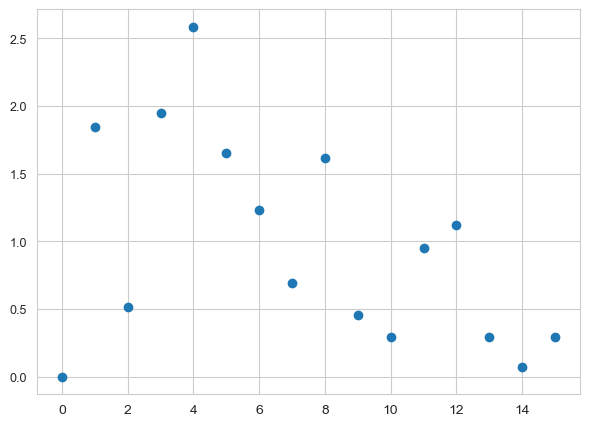

In [1485]:
plot_error_vs_number_iters()

# Scratch

### Manually inspect performance of specific weights

In [170]:
exp_info = dict(base_exp_info)
exp_info['FEAT_EXP_OBJECTIVE_NAMES'] = [
    'TPR_Z0', 'TPR_Z1',
#     'TNR_Z0', 'TNR_Z1',
    'FPR_Z0', 'FPR_Z1',
#     'FNR_Z0', 'FNR_Z1',
#     'Acc',
#     'DemPar',
#     'EqOpp',
#     'PredPar',
]
exp_info['RESTRICT_Y_ACTION'] = True

X, y, ft = generate_compas_dataset(20_000)
# X, y, ft = generate_adult_dataset(20_000)

# Initiate objectives
objectives = []
for obj_name in exp_info['FEAT_EXP_OBJECTIVE_NAMES']:
    objectives.append(OBJ_LOOKUP_BY_NAME[obj_name]())
feat_obj_set = ObjectiveSet(objectives)
del objectives
# Reset the objective set since they get fitted in each trial run
feat_obj_set.reset()


X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=.2,
)
del X, y


# Fit a classifier that predicts `y` from `X`.
clf = sklearn_clf_pipeline(
    feature_types=ft,
    clf_inst=RandomForestClassifier(),
)
clf.fit(X_train, y_train)

# Initiate variables needed to run IRL Loop
x_cols = (
    ft['boolean']
    + ft['categoric']
    + ft['continuous']
)
x_cols.remove('z')

# wi = [.2, .3, -.15, -.2]  # .598, .881, .906
# wi = [.195, .22, -.205, -.17]  # .608, .984, .994
wi = [.2, .3, .15, .2]  # .598, .881, .906
# wi = [.9, .02, .02]


reward_weights = { obj.name: wi[j] for j, obj in enumerate(feat_obj_set.objectives) }

test_df = X_test.copy()
test_df['y'] = y_test
# test_df = X_train.copy()
# test_df['y'] = y_train
# test_df['y'] = clf.predict(X_test)

clf_pol = compute_optimal_policy(
    clf_df=test_df,  # NOT the dataset used to train the C_{Y_Z,X} clf
    clf=clf,
    x_cols=x_cols,
    obj_set=feat_obj_set,
    reward_weights=reward_weights,
    skip_error_terms=True,
    method=exp_info['METHOD'],
    min_freq_fill_pct=exp_info['MIN_FREQ_FILL_PCT'],
)

demo = generate_demo(clf_pol, X_train, y_train, can_observe_y=False)
muj = feat_obj_set.compute_demo_feature_exp(demo)
print(f"\t\t muL = {np.round(muj, 3)}")


print('Acc', AccuracyObjective().compute_feat_exp(demo).round(3))
print('DemPar', DemographicParityObjective().compute_feat_exp(demo).round(3))
print('EqOpp', EqualOpportunityObjective().compute_feat_exp(demo).round(3))

display(demo.groupby(['z', 'y'])[['yhat']].agg(['count', 'mean', 'sum']))
display(demo.groupby(['z'])[['yhat']].agg(['count', 'mean', 'sum']))

		 muL = [0.748 0.776 0.503 0.396]
Acc 0.605
DemPar 0.947
EqOpp 0.972


yhat                  
    count      mean     sum
z y                        
0 0  4608  0.496745  2289.0
  1  4768  0.748112  3567.0
1 0  2650  0.604151  1601.0
  1  1970  0.776142  1529.0

yhat                  
  count      mean     sum
z                        
0  9376  0.624573  5856.0
1  4620  0.677489  3130.0

### SVM margin

In [1324]:
from research.ml.svm import SVM
from sklearn.preprocessing import normalize

In [1348]:
svm = SVM()

X = pd.DataFrame(np.array([
    np.array([.5, .5]),
    np.array([.5, .1]),
    np.array([.4, .2]),
    np.array([.2, .6]),
    np.array([.49, .49]),
    np.array([.51, .51]),
#     np.array([.61, .61]),
]), columns=['x1', 'x2'])

y = np.concatenate((
    np.array([1]),
    np.zeros(len(X)-1),
))


df = X.copy()
df['y'] = y

svm = svm.fit(X, y)

In [1349]:
# muE = X.iloc[0]
# muL = X.iloc[1]
# mu_delta = muE - muL
# w = svm.weights()
# w = normalize([w], norm='l1')[0]
# # t = np.linalg.norm(mu_delta.dot(w), ord=2)
# t = np.linalg.norm(mu_delta * w, ord=2)
# print(f"t: {t:.3f}")

Weights: [238.565  13.062]
Margin: 0.004


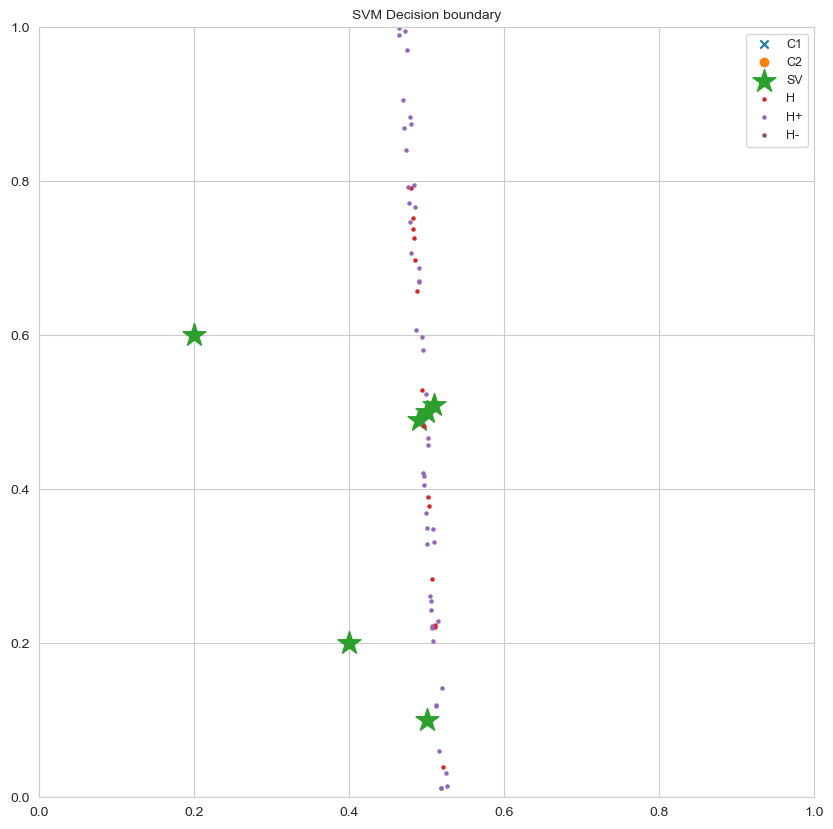

In [1350]:
print(f"Weights: {svm.weights().round(3)}")
print(f"Margin: {svm.margin():.3f}")
svm.plot_decision_boundary(X, y)

# HW Scratch

In [11]:
from math import comb
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

### Problem 1

In [28]:
def expected_4_cliques(n, p):
    return comb(n, 4) * p**6

In [45]:
def thresh_4_clique(n):
    return comb(n, 4)**(-(1/6))

In [120]:
expected_4_cliques(int(1e15), p=1e-9)

41666.66666666643

100000 0.0007883266647717149
1000000 0.0001698383027949114
10000000 3.659052019222436e-05


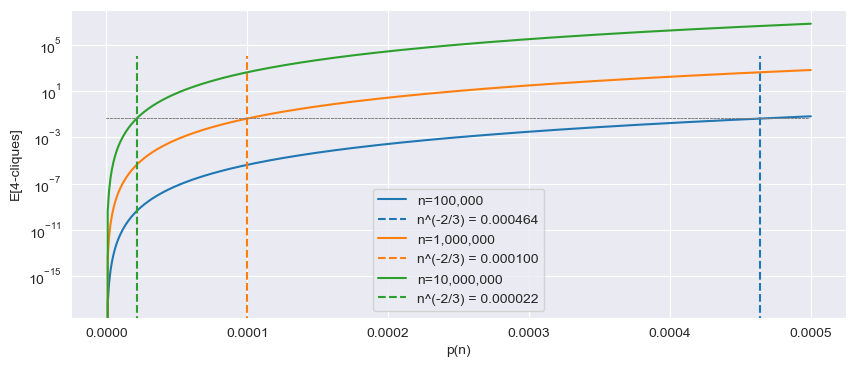

In [237]:
sns.set_style('darkgrid')
fig, ax = plt.subplots(1, 1, figsize=(10, 4))
cp = sns.color_palette()

for i, n in enumerate([100_000, 1_000_000, 10_000_000]):
    x = np.linspace(0, .0005, 501)
    y = [expected_4_cliques(n, p) for p in x]
    ax.plot(x, y, label=f"n={n:,}", c=cp[i])
    ax.set_xlabel('p(n)')
    ax.set_ylabel('E[4-cliques]')
    print(n, thresh_4_clique(n))
    
    thresh = n**(-2/3)
    threshx = [thresh for _ in range(10)]
    threshy = np.linspace(0, 1e4, 10)
    ax.plot(threshx, threshy, ls='--', label=f"n^(-2/3) = {thresh:.6f}", c=cp[i])
    
    x2 = np.linspace(0, .95*ax.get_xlim()[1], 2)
    y2 = .05*np.ones(2)
    ax.plot(x2, y2, ls='--', lw=.5, c='gray')

# ax.set_xscale('log')
ax.set_yscale('log')
ax.legend()
pass

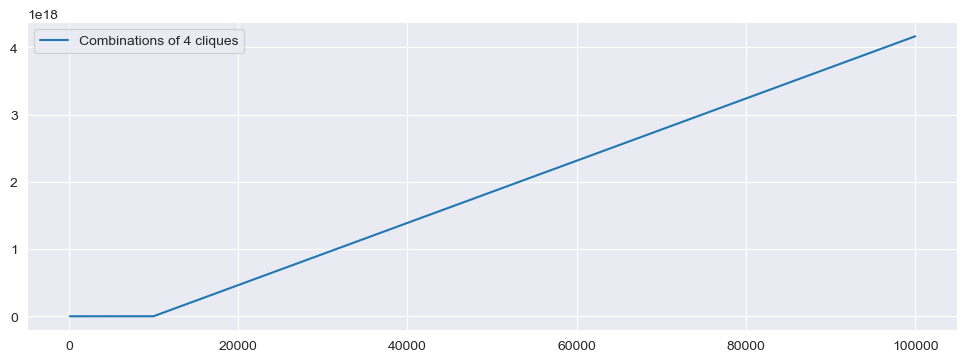

In [95]:
fig, ax = plt.subplots(1, 1, figsize=(12, 4))
x1 = [100, 1_000, 10_000, 100_000]
y1 = [comb(n, 4) for n in x1]
x2 = np.linspace(0, 1, 101)
y2 = [p**6 for p in x2]
ax.plot(x1, y1, label='Combinations of 4 cliques')
# ax.plot(x2, y2, label='p^6(n)')
ax.legend()

In [42]:
comb(1000, 4) * 2**(-(comb(4, 2)))

647142574.21875

In [43]:
2**(-(comb(4, 2)))

0.015625

### Problem 4

In [157]:
def prob_vertex_has_deg_k(n, k, p):
    return comb(n, k) * (p**k) * (1-p)**(n-k)

In [197]:
k_range = [
    3,
    int(np.log(n)),
    int(np.sqrt(n)),
    int(n-1),
]
n = 1_000
d = 100
p = d / n

for k in k_range:
    output = n * comb(n, k) * (p**k)
    print(k, ':', output)

3 : 166167000.00000003
6 : 1368173298991.5005
31 : 7.602322407769473e+30
999 : 0.0
